In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math
import sklearn.linear_model

%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=True)
#reload(c)

pandas.set_option('display.max_rows', 50)
pandas.set_option('display.max_columns', 50)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sources = pandas.read_csv("../data/derived/sources.extended.csv", index_col="source_id")


In [3]:
all_signatures = pandas.read_csv("../data/derived/main_signatures.csv", index_col=0)
all_signatures.columns = [c.replace("[", "(").replace("]", ")") for c in all_signatures.columns]
all_signatures.index = [
    x.replace("-", " ").replace(":", " ").replace(".", " ").replace(";", " ").replace("  ", " ")
    for x in all_signatures.index
]
all_signatures

,A(C>A)A,A(C>A)C,A(C>A)G,A(C>A)T,A(C>G)A,A(C>G)C,A(C>G)G,A(C>G)T,A(C>T)A,A(C>T)C,A(C>T)G,A(C>T)T,A(T>A)A,A(T>A)C,A(T>A)G,A(T>A)T,A(T>C)A,A(T>C)C,A(T>C)G,A(T>C)T,A(T>G)A,A(T>G)C,A(T>G)G,A(T>G)T,C(C>A)A,...,G(T>G)T,T(C>A)A,T(C>A)C,T(C>A)G,T(C>A)T,T(C>G)A,T(C>G)C,T(C>G)G,T(C>G)T,T(C>T)A,T(C>T)C,T(C>T)G,T(C>T)T,T(T>A)A,T(T>A)C,T(T>A)G,T(T>A)T,T(T>C)A,T(T>C)C,T(T>C)G,T(T>C)T,T(T>G)A,T(T>G)C,T(T>G)G,T(T>G)T
Signature 1,0.011098,0.009149,1.490070e-03,0.006234,0.001801,0.002581,0.000593,0.002964,0.029515,0.014323,0.171647,0.012624,4.021520e-03,0.002371,0.002811,0.008361,0.013916,0.006275,0.010138,0.009256,0.001588,0.001784,0.001386,0.003159,0.006596,...,0.000801,0.012250,0.011162,0.002276,0.015259,0.001875,0.002067,3.049000e-04,0.003152,0.014492,0.017681,0.076002,0.013762,0.005600,0.001999,0.001090,0.003981,0.008074,0.004857,0.008325,0.006257,1.397550e-03,0.001292,2.031080e-03,0.004030
Signature 2,0.000683,0.000619,9.928000e-05,0.000324,0.000263,0.000270,0.000219,0.000611,0.007442,0.002726,0.003322,0.003327,1.300000e-07,0.000113,0.000533,0.000149,0.001304,0.000426,0.000575,0.001488,0.000034,0.000025,0.000273,0.000218,0.000677,...,0.000086,0.015127,0.006532,0.001656,0.012395,0.037242,0.000019,1.625470e-03,0.066880,0.419941,0.081973,0.047720,0.228675,0.000081,0.000005,0.000067,0.000276,0.000102,0.000470,0.000192,0.000585,7.174000e-05,0.000014,2.066200e-04,0.000024
Signature 3,0.022172,0.017872,2.138340e-03,0.016265,0.024003,0.012160,0.005275,0.023278,0.017872,0.008896,0.003573,0.014798,8.428560e-03,0.007373,0.007357,0.008754,0.013036,0.009186,0.011717,0.016979,0.002351,0.001464,0.009054,0.007031,0.018782,...,0.007067,0.011653,0.016607,0.001357,0.016328,0.016041,0.020150,2.527910e-03,0.032674,0.008880,0.013530,0.001705,0.010304,0.007133,0.009103,0.006566,0.014712,0.009116,0.010954,0.006113,0.010774,5.427180e-03,0.006160,1.107653e-02,0.013001
Signature 4,0.036500,0.030900,1.830000e-02,0.024300,0.009700,0.005400,0.003100,0.005400,0.012000,0.007500,0.002800,0.005900,4.800000e-03,0.003900,0.010000,0.003000,0.008400,0.002000,0.008100,0.003600,0.000000,0.000200,0.001500,0.000200,0.046100,...,0.000200,0.033000,0.053800,0.010400,0.037000,0.003200,0.010500,3.100000e-03,0.005000,0.003500,0.007000,0.001100,0.007700,0.004500,0.004600,0.008200,0.004500,0.002800,0.001600,0.003600,0.002200,0.000000e+00,0.000300,3.000000e-03,0.001100
Signature 5,0.014942,0.008961,2.207850e-03,0.009207,0.011671,0.007292,0.002304,0.011696,0.021839,0.012756,0.016760,0.016478,8.902900e-03,0.007399,0.011508,0.011194,0.035367,0.013771,0.028449,0.027303,0.003462,0.002247,0.005490,0.003821,0.009675,...,0.003307,0.014774,0.012043,0.003902,0.018243,0.002681,0.007924,1.319080e-03,0.006645,0.010998,0.020645,0.007534,0.011787,0.009206,0.006835,0.007144,0.010241,0.017060,0.014196,0.012597,0.017375,5.202870e-03,0.005132,6.055250e-03,0.013370
Signature 6,0.001700,0.002800,5.000000e-04,0.001900,0.001300,0.001200,0.000000,0.001800,0.031200,0.016300,0.090800,0.014900,6.000000e-04,0.003300,0.000000,0.005300,0.007500,0.005600,0.021700,0.002300,0.000000,0.001700,0.000700,0.002900,0.010100,...,0.003500,0.001700,0.002900,0.001100,0.005800,0.000000,0.000200,0.000000e+00,0.000100,0.007400,0.006700,0.039100,0.004700,0.000200,0.000800,0.000000,0.000700,0.005900,0.003500,0.010600,0.002900,9.000000e-04,0.001900,1.100000e-03,0.007200
Signature 7,0.000400,0.000500,0.000000e+00,0.000400,0.000000,0.000000,0.000000,0.000100,0.000000,0.019700,0.000100,0.004300,1.000000e-03,0.000800,0.000900,0.003500,0.000500,0.000100,0.000700,0.001100,0.000000,0.000000,0.000900,0.000000,0.001200,...,0.000900,0.001000,0.002000,0.000200,0.001300,0.000200,0.001000,3.000000e-04,0.000700,0.120200,0.288700,0.099200,0.084400,0.001000,0.001500,0.001000,0.005000,0.002300,0.001800,0.001900,0.002400,0.000000e+00,0.001000,1.000000e-03,0.001400
Signature 8,0.036718,0.033246,2.525310e-03,0.033599,0.008357,0.004306,0.000584,0.008635,0.018067,0.005650,0.019265,0.020806,1.336508e-02,0.012431,0.014037,0.024110,0.016207,0.007788,0.009853,0.

In [4]:
deconvolution_df = pandas.read_csv("../data/derived/deconstructsigs_output.cleaned.csv",
                                   index_col=["source_id", "kind"])
for col in deconvolution_df.columns:
    if col.endswith(".1"):
        deconvolution_df[col[:-2]] = deconvolution_df[col]
        del deconvolution_df[col]
deconvolution_df

,,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,Signature 11,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans,treated,kind,source_id
source_id,kind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-166-1-2,all,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.063935,0.000000,0.000000,0.247810,0.000000,0.000000,0.514944,0.027659,0.000000,0.019389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.780521e-02,0.098456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,all,AOCS-166-1-2
AOCS-092-3-3,new,0.000000,0.000000,0.173333,0.000000,0.000000e+00,0.000000,0.024844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016921,0.091651,0.000000,0.000000,0.116639,0.167616,0.000000,0.000000e+00,0.000000,0.050547,0.000000,0.042833,0.000000,0.069326,0.186710,0.000000,0.059579,True,new,AOCS-092-3-3
AOCS-064-3-3,new,0.000000,0.000000,0.512506,0.000000,0.000000e+00,0.000000,0.000000,0.084197,0.055094,0.000000,0.000000,0.034058,0.003380,0.000000,0.009174,0.000000,0.055457,0.000000,0.027380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.015363,0.000000,0.037270,0.000000,0.014121,0.126428,0.025573,0.000000,True,new,AOCS-064-3-3
AOCS-064-1-6,all,0.000000,0.003423,0.428518,0.000000,0.000000e+00,0.021782,0.000000,0.377967,0.000000,0.000000,0.000000,0.035927,0.022082,0.000000,0.000000,0.000000,0.000000,0.000000,0.016438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.004630,0.000000,0.023175,0.003203,0.054922,0.000000,0.007934,False,all,AOCS-064-1-6
AOCS-064-3-3,all,0.000000,0.004057,0.476215,0.000000,1.688148e-08,0.020668,0.000000,0.274323,0.010258,0.000000,0.000000,0.041654,0.013586,0.000000,0.002314,0.000000,0.017646,0.000000,0.029744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.006438,0.009372,0.000000,0.000000,0.016624,0.077101,0.000000,0.000000,True,all,AOCS-064-3-3
AOCS-139-19-0,new,0.000000,0.008265,0.489320,0.000000,0.000000e+00,0.036037,0.000000,0.135020,0.035142,0.000000,0.000000,0.000000,0.015129,0.000000,0.000000,0.000000,0.000000,0.000000,0.035494,0.010675,0.000000,0.028931,0.000000,0.023343,0.000000e+00,0.000000,0.009943,0.000000,0.060892,0.028210,0.027423,0.056176,0.000000,0.000000,True,new,AOCS-139-19-0
AOCS-119-3-9,all,0.000000,0.008636,0.260254,0.000000,0.000000e+00,0.002356,0.000000,0.457431,0.000000,0.000000,0.000000,0.000000,0.027628,0.018171,0.000000,0.000000,0.000000,0.000000,0.073050,0.015405,0.000000,0.005377,0.000000,0.010547,0.000000e+00,0.000000,0.000000,0.000000,0.030038,0.040823,0.010367,0.030793,0.000000,0.009124,True,all,AOCS-119-3-9
AOCS-093-3-6,new,0.000000,0.025292,0.467042,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.025017,0.000000,0.000000,0.030642,0.044224,0.000000,0.000000,0.078019,0.000000,0.000000,0.046555,0.000000,0.000000,0.053690,0.064319,0.000000,0.000000e+00,0.000000,0.019902,0.000000,0.048672,0.000000,0.026710,0.059543,0.000000,0.010372,True,new,AOCS-093-3-6
AOCS-088-3-8,new,0.000000,0.055241,0.385917,0.000000,0.000000e+00,0.000000,0.000000,0.315491,0.005125,0.000000,0.014790,0.003386,0.082385,0.021290,0.000000,0.000000,0.000000,0.000000,0.035641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.002202,0.000000,0.000000,0.000000,0.009559,0.068972,0.000000,0.000000,True,new,AOCS-088-3-8


In [5]:
deconvolved_signatures_all = deconvolution_df.ix[deconvolution_df.kind == "all"].copy()
del deconvolved_signatures_all["treated"]
del deconvolved_signatures_all["kind"]
del deconvolved_signatures_all["source_id"]
deconvolved_signatures_all.index = deconvolved_signatures_all.index.droplevel(1)
deconvolved_signatures_all.shape

(114, 34)

In [6]:
deconvolved_signatures_new = deconvolution_df.ix[deconvolution_df.kind == "new"]
del deconvolved_signatures_new["treated"]
del deconvolved_signatures_new["kind"]
del deconvolved_signatures_new["source_id"]

deconvolved_signatures_new.index = deconvolved_signatures_new.index.droplevel(1)
deconvolved_signatures_new.shape

(14, 34)

In [7]:
deconvolved_signatures_new

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,Signature 11,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-092-3-3,0.000000,0.000000,0.173333,0.0,0.000000e+00,0.000000,0.024844,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.016921,0.091651,0.000000,0.0,0.116639,0.167616,0.000000,0.000000e+00,0.000000,0.050547,0.000000,0.042833,0.000000,0.069326,0.186710,0.000000,0.059579
AOCS-064-3-3,0.000000,0.000000,0.512506,0.0,0.000000e+00,0.000000,0.000000,0.084197,0.055094,0.0,0.000000,0.034058,0.003380,0.00000,0.009174,0.000000,0.055457,0.000000,0.027380,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.015363,0.000000,0.037270,0.000000,0.014121,0.126428,0.025573,0.000000
AOCS-139-19-0,0.000000,0.008265,0.489320,0.0,0.000000e+00,0.036037,0.000000,0.135020,0.035142,0.0,0.000000,0.000000,0.015129,0.00000,0.000000,0.000000,0.000000,0.000000,0.035494,0.010675,0.0,0.028931,0.000000,0.023343,0.000000e+00,0.000000,0.009943,0.000000,0.060892,0.028210,0.027423,0.056176,0.000000,0.000000
AOCS-093-3-6,0.000000,0.025292,0.467042,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.025017,0.0,0.000000,0.030642,0.044224,0.00000,0.000000,0.078019,0.000000,0.000000,0.046555,0.000000,0.0,0.053690,0.064319,0.000000,0.000000e+00,0.000000,0.019902,0.000000,0.048672,0.000000,0.026710,0.059543,0.000000,0.010372
AOCS-088-3-8,0.000000,0.055241,0.385917,0.0,0.000000e+00,0.000000,0.000000,0.315491,0.005125,0.0,0.014790,0.003386,0.082385,0.02129,0.000000,0.000000,0.000000,0.000000,0.035641,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.002202,0.000000,0.000000,0.000000,0.009559,0.068972,0.000000,0.000000
AOCS-034-3-8,0.007634,0.041865,0.381169,0.0,0.000000e+00,0.000000,0.004508,0.077574,0.015457,0.0,0.000000,0.000000,0.183161,0.00000,0.000000,0.014426,0.000000,0.000000,0.020510,0.000000,0.0,0.000000,0.119552,0.000000,0.000000e+00,0.000000,0.000000,0.005774,0.033498,0.000000,0.000000,0.066367,0.000000,0.028503
AOCS-086-3-2,0.015515,0.000000,0.435691,0.0,0.000000e+00,0.000000,0.003488,0.000000,0.018087,0.0,0.000000,0.010781,0.038104,0.00000,0.000000,0.051899,0.000000,0.000000,0.035364,0.000000,0.0,0.027158,0.123486,0.000000,0.000000e+00,0.000000,0.012045,0.000000,0.080586,0.000000,0.013805,0.116719,0.000000,0.017273
AOCS-137-3-7,0.016137,0.000000,0.578405,0.0,2.050389e-08,0.000000,0.000000,0.000000,0.005506,0.0,0.000000,0.041976,0.015786,0.00000,0.000000,0.095894,0.000000,0.000000,0.000000,0.000000,0.0,0.020268,0.053516,0.000000,0.000000e+00,0.036406,0.006255,0.000000,0.015814,0.000000,0.010157,0.086807,0.000000,0.017073
AOCS-095-3-1,0.021304,0.000000,0.443105,0.0,0.000000e+00,0.000000,0.007013,0.022160,0.000000,0.0,0.000000,0.000000,0.019826,0.00000,0.000000,0.000000,0.000000,0.000000,0.098285,0.000000,0.0,0.072245,0.044894,0.000000,0.000000e+00,0.006665,0.014862,0.000000,0.060635,0.000000,0.061787,0.121719,0.000000,0.005499


In [8]:
mutations = pandas.read_csv("../data/derived/annotated_mutations.with_mhc_binders.csv.bz2")
mutations = mutations.ix[mutations.confident]
#mutations["indel"] = mutations.ref.str.len() != mutations.alt.str.len()


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
mutations.shape

(1070404, 34)

In [9]:
treatments_matrix = pandas.read_csv("../data/derived/treatments_matrix.csv", index_col=0)
treatments_matrix

,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,bevacizumab,docetaxel,nab-paclitaxel,farletuzumab/placebo,etoposide
source_id,,,,,,,,,,,,,
AOCS-001-1-7,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-004-1-5,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-005-1-8,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-034-1-0,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-034-3-8,True,True,True,True,False,True,False,False,False,False,False,False,False
AOCS-055-1-7,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-056-1-X,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-057-1-2,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-058-1-5,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Compute residual signatures.
to_run = [
    ("all", deconvolved_signatures_all, mutations),
    ("new", deconvolved_signatures_new, mutations.ix[mutations.unique_to_treated]),
]
residuals = collections.defaultdict(lambda: collections.defaultdict(dict))
residual_participations = collections.defaultdict(dict)
for (kind, deconvolved_signatures, some_mutations) in to_run:
    some_mutations = some_mutations.ix[
        some_mutations.snv & some_mutations.source_id.isin(deconvolved_signatures.index)
    ]
    counts = some_mutations.groupby(["source_id", "context_mutation_3p5p"]).contig.count().unstack()
    totals = counts.sum(1)
    accounted_for_counts_by_signature = (totals * deconvolved_signatures.T).T
    accounted_for_counts_by_context = accounted_for_counts_by_signature.dot(
        all_signatures.ix[accounted_for_counts_by_signature.columns])
    unaccounted_for_counts = (counts - accounted_for_counts_by_context).applymap(lambda x: max(0, x))
    unaccounted_for_density = (unaccounted_for_counts.T / unaccounted_for_counts.sum(1)).T
    residuals["count"][kind] = unaccounted_for_counts
    residuals["density"][kind] = unaccounted_for_density
    
    residual_participations[kind] = 1 - deconvolved_signatures.sum(1)


residuals = pandas.Panel4D(residuals)
residuals

residuals_concat1 = residuals["density"]["new"].dropna().copy()
residuals_concat1["source_id"] = residuals_concat1.index
residuals_concat1["kind"] = "new"
residuals_concat2 = residuals["density"]["all"].dropna().copy()
residuals_concat2["source_id"] = residuals_concat2.index
residuals_concat2["kind"] = "all"
residuals_concat = pandas.concat([residuals_concat1, residuals_concat2], ignore_index=True)
residuals_concat["treated"] = [
    sources.ix[row.source_id].treated
    for (i, row) in residuals_concat.iterrows()
]

residuals_concat.index = [
     row.kind[0] + str(row.treated)[0] + row.source_id.replace("AOCS-", "").split("/")[0]
    for (i, row) in residuals_concat.iterrows()
]
residuals_concat_treated = residuals_concat.treated
residuals_source_id = residuals_concat.source_id

#del residuals_concat["treated"]
#del residuals_concat["source_id"]
#del residuals_concat["kind"]
residuals_concat

'''
subselection = residuals_concat_treated

#X = residuals_concat.ix[subselection]
#y = treatments_matrix.ix[residuals_source_id[subselection]].cyclophosphamide

X = residuals_concat
y = residuals_concat_treated


model = sklearn.linear_model.LogisticRegressionCV()
score = sklearn.cross_validation.cross_val_score(model, X, y, scoring='roc_auc')
print(score)
model.fit(X, y)
coef = pandas.Series(model.coef_[0], index=residuals_concat.columns).sort(inplace=False, ascending=False)
print(coef.head())

result = pandas.DataFrame({'rate': residuals_concat["G(C>T)C"],
                  'cyc': [treatments_matrix.cyclophosphamide[x] for x in residuals_source_id],
                  'treated': [sources.treated[x] for x in residuals_source_id],
                 }).sort('rate', ascending=False)
result.groupby("cyc").rate.mean()

import sklearn.cluster
clustering = sklearn.cluster.AgglomerativeClustering(linkage="average", n_clusters=5, affinity='cosine')
clustering_result = pandas.Series(clustering.fit_predict(residuals_concat), index=residuals_concat.index)
clustering

for value in sorted(clustering_result.unique()):
    print("%s\n" % " ".join(clustering_result[clustering_result == value].index))
'''

'\nsubselection = residuals_concat_treated\n\n#X = residuals_concat.ix[subselection]\n#y = treatments_matrix.ix[residuals_source_id[subselection]].cyclophosphamide\n\nX = residuals_concat\ny = residuals_concat_treated\n\n\nmodel = sklearn.linear_model.LogisticRegressionCV()\nscore = sklearn.cross_validation.cross_val_score(model, X, y, scoring=\'roc_auc\')\nprint(score)\nmodel.fit(X, y)\ncoef = pandas.Series(model.coef_[0], index=residuals_concat.columns).sort(inplace=False, ascending=False)\nprint(coef.head())\n\nresult = pandas.DataFrame({\'rate\': residuals_concat["G(C>T)C"],\n                  \'cyc\': [treatments_matrix.cyclophosphamide[x] for x in residuals_source_id],\n                  \'treated\': [sources.treated[x] for x in residuals_source_id],\n                 }).sort(\'rate\', ascending=False)\nresult.groupby("cyc").rate.mean()\n\nimport sklearn.cluster\nclustering = sklearn.cluster.AgglomerativeClustering(linkage="average", n_clusters=5, affinity=\'cosine\')\nclustering

In [62]:
(counts - accounted_for_counts_by_context)
totals
counts


accounted_for_counts_by_context.sum(1)
accounted_for_counts_by_signature.sum(1)


source_id
AOCS-034-3-8      5827.0
AOCS-064-3-3      8626.0
AOCS-065-3-6      1696.0
AOCS-086-3-2      6703.0
AOCS-088-3-8     10595.0
AOCS-091-3-0      8229.0
AOCS-092-3-3      6499.0
AOCS-093-3-6      3840.0
AOCS-094-6-X      5862.0
AOCS-095-3-1      4648.0
AOCS-137-3-7      4898.0
AOCS-139-12-5     7988.0
AOCS-139-19-0    11303.0
AOCS-139-6-3      7272.0
dtype: float64

In [61]:
totals

source_id
AOCS-034-3-8      5827
AOCS-064-3-3      8626
AOCS-065-3-6      1696
AOCS-086-3-2      6703
AOCS-088-3-8     10595
AOCS-091-3-0      8229
AOCS-092-3-3      6499
AOCS-093-3-6      3840
AOCS-094-6-X      5862
AOCS-095-3-1      4648
AOCS-137-3-7      4898
AOCS-139-12-5     7988
AOCS-139-19-0    11303
AOCS-139-6-3      7272
dtype: int64

In [45]:
residual_participations

defaultdict(dict, {'all': source_id
             AOCS-166-1-2    -2.220446e-16
             AOCS-064-1-6     0.000000e+00
             AOCS-064-3-3     3.330669e-16
             AOCS-119-3-9     1.110223e-16
             AOCS-088-3-8    -4.440892e-16
             AOCS-091-1-3    -2.220446e-16
             AOCS-155-3-5     0.000000e+00
             AOCS-150-3-1    -2.220446e-16
             AOCS-158-1-6     0.000000e+00
             AOCS-150-8-X    -4.440892e-16
             AOCS-088-1-0     0.000000e+00
             AOCS-095-3-1    -2.220446e-16
             AOCS-139-19-0    1.110223e-16
             AOCS-034-3-8    -2.220446e-16
             AOCS-148-1-4    -2.220446e-16
             AOCS-094-1-1     2.220446e-16
             AOCS-125-1-2     4.440892e-16
             AOCS-107-1-4    -4.440892e-16
             AOCS-086-3-2     1.110223e-16
             AOCS-146-1-9     0.000000e+00
             AOCS-092-3-3    -2.220446e-16
             AOCS-120-3-6    -2.220446e-16
             AOCS-

In [11]:
residuals_concat.to_csv("../data/derived/residual_signatures.csv", index=False)
residuals_concat

context_mutation_3p5p,A(C>A)A,A(C>A)C,A(C>A)G,A(C>A)T,A(C>G)A,A(C>G)C,A(C>G)G,A(C>G)T,A(C>T)A,A(C>T)C,A(C>T)G,A(C>T)T,A(T>A)A,A(T>A)C,A(T>A)G,A(T>A)T,A(T>C)A,A(T>C)C,A(T>C)G,A(T>C)T,A(T>G)A,A(T>G)C,A(T>G)G,A(T>G)T,C(C>A)A,...,T(C>A)G,T(C>A)T,T(C>G)A,T(C>G)C,T(C>G)G,T(C>G)T,T(C>T)A,T(C>T)C,T(C>T)G,T(C>T)T,T(T>A)A,T(T>A)C,T(T>A)G,T(T>A)T,T(T>C)A,T(T>C)C,T(T>C)G,T(T>C)T,T(T>G)A,T(T>G)C,T(T>G)G,T(T>G)T,source_id,kind,treated
nT034-3-8,0.000000,0.014641,0.000000,0.000000,0.008653,0.017456,0.005262,0.029977,0.003576,0.000000,0.015502,0.000000,0.009293,0.000670,0.000000,0.014277,0.035374,0.000000,0.000000,0.000000,0.015785,0.000000,0.016116,0.016015,0.006451,...,0.000000,0.006165,0.000000,0.000000,0.001523,0.054759,0.000000,0.000000,0.002195,0.026557,0.000000,0.000000,0.000000,0.000000,0.025438,0.007647,0.000000,0.000000,0.015784,0.000000,0.009528,0.022429,AOCS-034-3-8,new,True
nT064-3-3,0.000000,0.003837,0.000000,0.059208,0.000000,0.000000,0.007146,0.020232,0.052909,0.000000,0.000000,0.013053,0.000000,0.010135,0.009705,0.023870,0.000000,0.000000,0.000000,0.004534,0.017284,0.005951,0.010361,0.002406,0.000000,...,0.000000,0.000000,0.013179,0.000000,0.004736,0.012113,0.005073,0.000000,0.000000,0.001745,0.000000,0.000667,0.000000,0.013571,0.021093,0.034195,0.000000,0.025796,0.000000,0.000000,0.004438,0.028112,AOCS-064-3-3,new,True
nT065-3-6,0.000000,0.000000,0.000493,0.034742,0.000000,0.009002,0.000000,0.095461,0.012824,0.000000,0.000000,0.000000,0.005445,0.000000,0.008826,0.079588,0.024206,0.000000,0.000000,0.002457,0.000269,0.006332,0.008527,0.000000,0.000000,...,0.000000,0.000000,0.049431,0.000000,0.000000,0.000000,0.003926,0.000000,0.015571,0.006430,0.000000,0.031337,0.000000,0.000000,0.044157,0.000000,0.000000,0.030873,0.019573,0.000000,0.000000,0.000000,AOCS-065-3-6,new,True
nT086-3-2,0.000000,0.022982,0.000000,0.000000,0.000000,0.000000,0.008124,0.014647,0.000000,0.000000,0.018905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003819,0.018031,0.001309,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.012486,0.010384,0.000000,0.000000,0.000000,0.005761,0.000000,0.000000,0.000000,0.005747,0.013635,0.000000,0.013227,0.003938,0.000000,0.008108,0.015305,AOCS-086-3-2,new,True
nT088-3-8,0.000000,0.046091,0.000000,0.011041,0.000000,0.020284,0.005078,0.000000,0.042728,0.000000,0.000000,0.049339,0.000000,0.000000,0.000000,0.000903,0.002501,0.016428,0.000000,0.000000,0.028400,0.011351,0.014874,0.007782,0.000000,...,0.009789,0.030993,0.000000,0.000000,0.022319,0.048017,0.000000,0.001524,0.000000,0.041744,0.000000,0.007054,0.000000,0.000000,0.054390,0.054095,0.010449,0.007621,0.016131,0.000000,0.048404,0.000000,AOCS-088-3-8,new,True
nT091-3-0,0.000000,0.030104,0.000000,0.003750,0.069546,0.000000,0.000000,0.002310,0.041780,0.000000,0.009885,0.014056,0.000000,0.001225,0.000000,0.000000,0.033070,0.000000,0.002259,0.000000,0.020135,0.007850,0.003100,0.000000,0.000000,...,0.000000,0.000000,0.004521,0.000000,0.000000,0.005577,0.021929,0.000000,0.000000,0.000000,0.009635,0.000381,0.000000,0.000000,0.033362,0.017917,0.000000,0.019015,0.027705,0.000000,0.000000,0.000000,AOCS-091-3-0,new,True
nT092-3-3,0.001927,0.038274,0.000000,0.020116,0.002261,0.000000,0.000000,0.000762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000047,0.007798,0.001450,0.000000,0.012482,0.014956,...,0.000000,0.017244,0.019537,0.000000,0.001016,0.051748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007426,0.000000,0.001831,0.000000,0.000000,0.004006,0.005103,AOCS-092-3-3,new,True
nT093-3-6,0.000000,0.047351,0.000000,0.026647,0.000000,0.000000,0.008133,0.000000,0.000000,0.000000,0.007864,0.014316,0.000000,0.000000,0.001838,0.016814,0.007858,0.006413,0.000000,0.000000,0.000000,0.006074,0.000000,0.003551,0.000000,...,0.000000,0.012640,0.014067,0.016424,0.000000,0.000000,0.008459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [12]:
residual_participations

defaultdict(dict, {'all': source_id
             AOCS-166-1-2    -2.220446e-16
             AOCS-064-1-6     0.000000e+00
             AOCS-064-3-3     3.330669e-16
             AOCS-119-3-9     1.110223e-16
             AOCS-088-3-8    -4.440892e-16
             AOCS-091-1-3    -2.220446e-16
             AOCS-155-3-5     0.000000e+00
             AOCS-150-3-1    -2.220446e-16
             AOCS-158-1-6     0.000000e+00
             AOCS-150-8-X    -4.440892e-16
             AOCS-088-1-0     0.000000e+00
             AOCS-095-3-1    -2.220446e-16
             AOCS-139-19-0    1.110223e-16
             AOCS-034-3-8    -2.220446e-16
             AOCS-148-1-4    -2.220446e-16
             AOCS-094-1-1     2.220446e-16
             AOCS-125-1-2     4.440892e-16
             AOCS-107-1-4    -4.440892e-16
             AOCS-086-3-2     1.110223e-16
             AOCS-146-1-9     0.000000e+00
             AOCS-092-3-3    -2.220446e-16
             AOCS-120-3-6    -2.220446e-16
             AOCS-

In [13]:
all_mutations_with_signatures_primary_and_new = mutations.ix[mutations.snv].copy().reset_index()

# If a mutation is unique to treated, we use the "new" signatures, otherwise we use the full sample signatures.
extra_columns = []

for (i, row) in all_mutations_with_signatures_primary_and_new.iterrows():
    if i % 10000 == 0:
        print("%d / %d" % (i, len(all_mutations_with_signatures_primary_and_new)))
    if row.unique_to_treated and row.source_id in deconvolved_signatures_new.index:
        signature_participations = deconvolved_signatures_new.ix[row.source_id]
        kind = 'new'
    else:
        signature_participations = deconvolved_signatures_all.ix[row.source_id]
        kind = 'all'
    
    unnormalized = (
        all_signatures.ix[signature_participations.index, row.context_mutation_3p5p]
        * signature_participations).tolist()

    # Add sample-specific "residual" signature.
    unnormalized.append(
        residuals.density.ix[kind, row.source_id, row.context_mutation_3p5p]
        * residual_participations[kind][row.source_id])
    
    unnormalized = numpy.array(unnormalized)
    normalized = unnormalized / unnormalized.sum()
    extra_columns.append(normalized)


new_df = pandas.DataFrame(
    extra_columns,
    columns=list(signature_participations.index) + ["residual"])
for col in new_df.columns:
    all_mutations_with_signatures_primary_and_new[col] = new_df[col]

all_mutations_with_signatures_primary_and_new


0 / 1059438
10000 / 1059438
20000 / 1059438
30000 / 1059438
40000 / 1059438
50000 / 1059438
60000 / 1059438
70000 / 1059438
80000 / 1059438
90000 / 1059438
100000 / 1059438
110000 / 1059438
120000 / 1059438
130000 / 1059438
140000 / 1059438
150000 / 1059438
160000 / 1059438
170000 / 1059438
180000 / 1059438
190000 / 1059438
200000 / 1059438
210000 / 1059438
220000 / 1059438
230000 / 1059438
240000 / 1059438
250000 / 1059438
260000 / 1059438
270000 / 1059438
280000 / 1059438
290000 / 1059438
300000 / 1059438
310000 / 1059438
320000 / 1059438
330000 / 1059438
340000 / 1059438
350000 / 1059438
360000 / 1059438
370000 / 1059438
380000 / 1059438
390000 / 1059438
400000 / 1059438
410000 / 1059438
420000 / 1059438
430000 / 1059438
440000 / 1059438
450000 / 1059438
460000 / 1059438
470000 / 1059438
480000 / 1059438
490000 / 1059438
500000 / 1059438
510000 / 1059438
520000 / 1059438
530000 / 1059438
540000 / 1059438
550000 / 1059438
560000 / 1059438
570000 / 1059438
580000 / 1059438
590000 / 10

,index,source_id,donor,genome,contig,interbase_start,interbase_end,ref,alt,sources,effect,gene,context_5_prime,context_3_prime,context_mutation,binding_affinity,binding_allele,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,context_mutation_3p5p,binding_peptides,...,Signature 11,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans,residual
0,0,AOCS-001-1-7,AOCS-001,GRCh37,14,24774226.0,24774227.0,C,A,annotated_mutations,silent,NOP9,ACCTTCCTAAAGCGG,GAGAGGCTTGGGAAC,C>A,NaN,NaN,17.0,28.0,45.0,185.0,244.0,429.0,G(C>A)G,{},...,0.000000,0.000000,0.003055,0.0,0.0,0.271404,0.0,0.0,0.000000,0.0,0.002607,0.000326,0.0,0.404463,0.008630,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
1,1,AOCS-001-1-7,AOCS-001,GRCh37,X,19968971.0,19968972.0,T,C,annotated_mutations,p.I548M,CXorf23,GTCATTTGGATCTAT,ATTTTGATCAGAGTC,T>C,94.33,B*41:01,16.0,51.0,67.0,0.0,77.0,77.0,T(T>C)A,"{'TLIKMIDPNDL': 12113.63, 'SEQTLIKMI': 166.52,...",...,0.000596,0.000000,0.004740,0.0,0.0,0.355338,0.0,0.0,0.006423,0.0,0.064775,0.000900,0.0,0.002802,0.036467,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-2.218086e-15
2,2,AOCS-001-1-7,AOCS-001,GRCh37,8,35406835.0,35406836.0,G,A,annotated_mutations,p.E44K,UNC5D,CTGATGGGATGGATT,GGGAAGGGCTTCGCC,C>T,80.84,A*11:01,14.0,39.0,53.0,0.0,0.0,0.0,T(C>T)G,"{'NGEALPKSIP': 46300.87, 'GTDNGEALPK': 80.84, ...",...,0.021137,0.000000,0.032725,0.0,0.0,0.046130,0.0,0.0,0.009861,0.0,0.018612,0.000249,0.0,0.007925,0.031388,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
3,3,AOCS-001-1-7,AOCS-001,GRCh37,7,47872830.0,47872831.0,A,G,annotated_mutations,p.L2065P,HUS1 PKD1L1,CTGCATCAGCCATTC,CTCTGGGAGTGGCAG,T>C,343.29,A*11:01,16.0,31.0,47.0,0.0,1.0,1.0,C(T>C)C,"{'KQPASAIPS': 21387.37, 'ASAIPSGSGR': 343.29, ...",...,0.001023,0.000000,0.000225,0.0,0.0,0.240680,0.0,0.0,0.007426,0.0,0.014302,0.000218,0.0,0.006371,0.023243,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-5.164558e-16
4,4,AOCS-001-1-7,AOCS-001,GRCh37,17,17721666.0,17721667.0,G,C,annotated_mutations,p.R394G,SREBF1,AAATCTGCTGTCTTG,GCAAGGCCATCGACT,C>G,43.42,C*15:02,12.0,22.0,34.0,200.0,54.0,254.0,G(C>G)G,"{'KSAVLGKA': 3782.49, 'LNKSAVLGKAI': 20883.23,...",...,0.000000,0.000000,0.005800,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000472,0.0,0.109925,0.012325,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-3.827825e-16
5,5,AOCS-001-1-7,AOCS-001,GRCh37,7,148169063.0,148169064.0,G,T,annotated_mutations,intergenic,None,CAAAGAAGGGCCACC,AATCTAAACCAGCAC,C>A,NaN,NaN,19.0,39.0,58.0,0.0,0.0,0.0,C(C>A)A,{},...,0.001182,0.000000,0.005861,0.0,0.0,0.130207,0.0,0.0,0.007843,0.0,0.001888,0.000483,0.0,0.060020,0.021127,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
6,6,AOCS-001-1-7,AOCS-001,GRCh37,1,107152783.0,107152784.0,G,A,annotated_mutations,intergenic,None,TCCACTGTGTTTGTT,ATCCCTTACAAAAGA,C>T,NaN,NaN,14.0,69.0,83.0,0.0,0.0,0.0,T(C>T)A,{},...,0.032307,0.000000,0.247194,0.0,0.0,0.089237,0.0,0.0,0.009671,0.0,0.003828,0.000136,0.0,0.015897,0.009996,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
7,7,AOCS-001-1-7,AOCS-001,GRCh37,2,142133268.0,142133269.0,T,A,annotated_mutations,intronic,LRP1B,GCATTAAATTCCCAA,ATTGCACTTTGGTCC,T>A,NaN,NaN,9.0,28.0,37.0,0.0,0.0,0.0,A(T>A)A,{},...,0.000740,0.000000,0.009344,0.0,0.0,0.145422,0.0,0.0,0.001689,0.0,0.017178,0.011556,0.0,0.002415,0.063798,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
8,8,AOCS-001-1-7,AOCS-001,GRCh37,2,143687576.0,143687577.0,G,A,annotated_mutations,intronic,KYNU,GCCCTACAAAGCCTT,TGTTGTGAGGGAAAA,C>T,NaN,NaN,11.0,55.0,66.0,0.0,0.0,0.0,T(C>T)T,{},...,0.133650,0.000000,0.080019,0.0,0.0,0.131129,0.0,0.0,0.015512,0.0,0.005013,0.000104,0.0,0.004335,0.014676,0.0,0.0,0.000000

In [14]:
new_df = pandas.DataFrame(
    extra_columns,
    columns=list(signature_participations.index) + ["residual"])
for col in new_df.columns:
    all_mutations_with_signatures_primary_and_new[col] = new_df[col]

all_mutations_with_signatures_primary_and_new

,index,source_id,donor,genome,contig,interbase_start,interbase_end,ref,alt,sources,effect,gene,context_5_prime,context_3_prime,context_mutation,binding_affinity,binding_allele,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,context_mutation_3p5p,binding_peptides,...,Signature 11,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans,residual
0,0,AOCS-001-1-7,AOCS-001,GRCh37,14,24774226.0,24774227.0,C,A,annotated_mutations,silent,NOP9,ACCTTCCTAAAGCGG,GAGAGGCTTGGGAAC,C>A,NaN,NaN,17.0,28.0,45.0,185.0,244.0,429.0,G(C>A)G,{},...,0.000000,0.000000,0.003055,0.0,0.0,0.271404,0.0,0.0,0.000000,0.0,0.002607,0.000326,0.0,0.404463,0.008630,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
1,1,AOCS-001-1-7,AOCS-001,GRCh37,X,19968971.0,19968972.0,T,C,annotated_mutations,p.I548M,CXorf23,GTCATTTGGATCTAT,ATTTTGATCAGAGTC,T>C,94.33,B*41:01,16.0,51.0,67.0,0.0,77.0,77.0,T(T>C)A,"{'TLIKMIDPNDL': 12113.63, 'SEQTLIKMI': 166.52,...",...,0.000596,0.000000,0.004740,0.0,0.0,0.355338,0.0,0.0,0.006423,0.0,0.064775,0.000900,0.0,0.002802,0.036467,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-2.218086e-15
2,2,AOCS-001-1-7,AOCS-001,GRCh37,8,35406835.0,35406836.0,G,A,annotated_mutations,p.E44K,UNC5D,CTGATGGGATGGATT,GGGAAGGGCTTCGCC,C>T,80.84,A*11:01,14.0,39.0,53.0,0.0,0.0,0.0,T(C>T)G,"{'NGEALPKSIP': 46300.87, 'GTDNGEALPK': 80.84, ...",...,0.021137,0.000000,0.032725,0.0,0.0,0.046130,0.0,0.0,0.009861,0.0,0.018612,0.000249,0.0,0.007925,0.031388,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
3,3,AOCS-001-1-7,AOCS-001,GRCh37,7,47872830.0,47872831.0,A,G,annotated_mutations,p.L2065P,HUS1 PKD1L1,CTGCATCAGCCATTC,CTCTGGGAGTGGCAG,T>C,343.29,A*11:01,16.0,31.0,47.0,0.0,1.0,1.0,C(T>C)C,"{'KQPASAIPS': 21387.37, 'ASAIPSGSGR': 343.29, ...",...,0.001023,0.000000,0.000225,0.0,0.0,0.240680,0.0,0.0,0.007426,0.0,0.014302,0.000218,0.0,0.006371,0.023243,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-5.164558e-16
4,4,AOCS-001-1-7,AOCS-001,GRCh37,17,17721666.0,17721667.0,G,C,annotated_mutations,p.R394G,SREBF1,AAATCTGCTGTCTTG,GCAAGGCCATCGACT,C>G,43.42,C*15:02,12.0,22.0,34.0,200.0,54.0,254.0,G(C>G)G,"{'KSAVLGKA': 3782.49, 'LNKSAVLGKAI': 20883.23,...",...,0.000000,0.000000,0.005800,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000472,0.0,0.109925,0.012325,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-3.827825e-16
5,5,AOCS-001-1-7,AOCS-001,GRCh37,7,148169063.0,148169064.0,G,T,annotated_mutations,intergenic,None,CAAAGAAGGGCCACC,AATCTAAACCAGCAC,C>A,NaN,NaN,19.0,39.0,58.0,0.0,0.0,0.0,C(C>A)A,{},...,0.001182,0.000000,0.005861,0.0,0.0,0.130207,0.0,0.0,0.007843,0.0,0.001888,0.000483,0.0,0.060020,0.021127,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
6,6,AOCS-001-1-7,AOCS-001,GRCh37,1,107152783.0,107152784.0,G,A,annotated_mutations,intergenic,None,TCCACTGTGTTTGTT,ATCCCTTACAAAAGA,C>T,NaN,NaN,14.0,69.0,83.0,0.0,0.0,0.0,T(C>T)A,{},...,0.032307,0.000000,0.247194,0.0,0.0,0.089237,0.0,0.0,0.009671,0.0,0.003828,0.000136,0.0,0.015897,0.009996,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
7,7,AOCS-001-1-7,AOCS-001,GRCh37,2,142133268.0,142133269.0,T,A,annotated_mutations,intronic,LRP1B,GCATTAAATTCCCAA,ATTGCACTTTGGTCC,T>A,NaN,NaN,9.0,28.0,37.0,0.0,0.0,0.0,A(T>A)A,{},...,0.000740,0.000000,0.009344,0.0,0.0,0.145422,0.0,0.0,0.001689,0.0,0.017178,0.011556,0.0,0.002415,0.063798,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00
8,8,AOCS-001-1-7,AOCS-001,GRCh37,2,143687576.0,143687577.0,G,A,annotated_mutations,intronic,KYNU,GCCCTACAAAGCCTT,TGTTGTGAGGGAAAA,C>T,NaN,NaN,11.0,55.0,66.0,0.0,0.0,0.0,T(C>T)T,{},...,0.133650,0.000000,0.080019,0.0,0.0,0.131129,0.0,0.0,0.015512,0.0,0.005013,0.000104,0.0,0.004335,0.014676,0.0,0.0,0.000000

In [15]:
all_mutations_with_signatures_primary_and_new["Cisplatin Gallus gallus"].sum()

5266.535979840428

In [16]:
'''
all_mutations_with_signatures = mutations.ix[mutations.snv]
new_mutations_with_signatures = mutations.ix[
    mutations.snv & mutations.source_id.isin(deconvolved_signatures_new.index) & mutations.unique_to_treated
]

def add_signature_columns(kind, mutations_df, signature_participations, all_signatures):
    mutations_df = mutations_df.copy().reset_index()
    extra_columns = []
    for (i, row) in mutations_df.iterrows():
        unnormalized = [
            all_signatures.ix[signature][row.context_mutation_3p5p] * participation
            for (signature, participation) in signature_participations.ix[row.source_id].iteritems()
        ]
        # Add sample-specific "residual" signature.
        unnormalized.append(
            residuals.density.ix[kind, row.source_id, row.context_mutation_3p5p] * residual_participations[kind][row.source_id])
        
        unnormalized = numpy.array(unnormalized)
        if numpy.isnan(unnormalized).any():
            print(i, row, unnormalized, signature, row.context_mutation_3p5, participation)
            raise ValueError()
        normalized = unnormalized / unnormalized.sum()
        extra_columns.append(normalized)
    new_df = pandas.DataFrame(extra_columns, columns=list(signature_participations.columns) + ["residual"])
    for col in new_df.columns:
        mutations_df[col] = new_df[col]
    return mutations_df

all_mutations_with_signatures = add_signature_columns(
    "all", all_mutations_with_signatures, deconvolved_signatures_all, all_signatures)
all_mutations_with_signatures

new_mutations_with_signatures = add_signature_columns(
    "new", new_mutations_with_signatures, deconvolved_signatures_new, all_signatures)
new_mutations_with_signatures
'''

'\nall_mutations_with_signatures = mutations.ix[mutations.snv]\nnew_mutations_with_signatures = mutations.ix[\n    mutations.snv & mutations.source_id.isin(deconvolved_signatures_new.index) & mutations.unique_to_treated\n]\n\ndef add_signature_columns(kind, mutations_df, signature_participations, all_signatures):\n    mutations_df = mutations_df.copy().reset_index()\n    extra_columns = []\n    for (i, row) in mutations_df.iterrows():\n        unnormalized = [\n            all_signatures.ix[signature][row.context_mutation_3p5p] * participation\n            for (signature, participation) in signature_participations.ix[row.source_id].iteritems()\n        ]\n        # Add sample-specific "residual" signature.\n        unnormalized.append(\n            residuals.density.ix[kind, row.source_id, row.context_mutation_3p5p] * residual_participations[kind][row.source_id])\n        \n        unnormalized = numpy.array(unnormalized)\n        if numpy.isnan(unnormalized).any():\n            print(

In [17]:
'''
mutations_with_signatures = pandas.concat([
        primary_mutations_with_signatures.ix[sources.index[~sources.treated]],
        new_mutations_with_signatures,
], ignore_index=True)
print(mutations_with_signatures.shape)
mutations_with_signatures.to_csv("../data/mutations_with_signatures.csv")
mutations_with_signatures
'''

'\nmutations_with_signatures = pandas.concat([\n        primary_mutations_with_signatures.ix[sources.index[~sources.treated]],\n        new_mutations_with_signatures,\n], ignore_index=True)\nprint(mutations_with_signatures.shape)\nmutations_with_signatures.to_csv("../data/mutations_with_signatures.csv")\nmutations_with_signatures\n'

In [18]:
muts_confident = mutations.ix[
    mutations.confident
]
muts_confident_coding = muts_confident.ix[muts_confident.effect.str.startswith("p.")]
muts_confident_coding_expressed = muts_confident_coding.ix[muts_confident_coding.rna_alt_reads > 2]

non_exon_effects = [
    "intergenic",
    "intragenic",
    "intronic",
    "non-coding-transcript",
    "incomplete",
    "splice-acceptor",
    "splice-donor",
    "intronic-splice-site",
    "exonic-splice-site",
    "3' UTR",
    "5' UTR",
]

muts_confident_exon = muts_confident.ix[~ muts_confident.effect.isin(non_exon_effects)]
muts_exon = mutations.ix[~ mutations.effect.isin(non_exon_effects)]

[x for x in muts_confident_exon.effect.unique().tolist() if not x.startswith("p.")]


['silent']

In [97]:
use_signatures = [
    "Cisplatin Gallus gallus",
    'Cyclophosphamide Gallus gallus',
    "Etoposide Gallus gallus",
    'Cisplatin C Elegans',
    #'Cisplatin C Elegans fcd 2',
    #'Cisplatin C Elegans polq 1',
    #'Cisplatin C Elegans slx 1',
    #'Cisplatin C Elegans xpf 1',
    "Signature 1",
    "Signature 3",
    "Signature 8",
    "residual"
]

sources_with_signature_counts = sources.copy()
for source_id in sources.index:
    sub_all_muts = mutations.ix[(mutations.source_id == source_id)]
    sub_exon_muts = muts_exon.ix[(mutations.source_id == source_id)]
    grouped = all_mutations_with_signatures_primary_and_new.ix[
        all_mutations_with_signatures_primary_and_new.source_id == source_id
    ]
    expressed_grouped = grouped.ix[grouped.rna_alt_reads > 2]

    num_mutations = float(sub_all_muts.shape[0])
    num_exon_mutations = float(sub_exon_muts.shape[0])
    num_neoantigens = float(sub_all_muts.num_binders.sum())
    num_expressed_neoantigens = float(
        sub_all_muts.ix[sub_all_muts.rna_alt_reads > 2].num_binders.sum())

    
    snv_mutations_accounted_for = 0.0
    snv_neoantigens_accounted_for = 0.0
    snv_expressed_neoantigens_accounted_for = 0.0

    for sig in use_signatures:
        snv_mutations_accounted_for += grouped[sig].sum()
        snv_neoantigens_accounted_for += numpy.dot(grouped[sig], grouped.num_binders)
        snv_expressed_neoantigens_accounted_for += numpy.dot(
            expressed_grouped[sig], expressed_grouped.num_binders)

        sources_with_signature_counts.loc[source_id, "%s mutations" % sig] = grouped[sig].sum() / num_mutations
        sources_with_signature_counts.loc[source_id, "%s neoantigens" % sig] = (
            numpy.dot(grouped[sig], grouped.num_binders)) / num_neoantigens
        sources_with_signature_counts.loc[source_id, "%s expressed neoantigens" % sig] = (
            numpy.dot(expressed_grouped[sig], expressed_grouped.num_binders)) / num_expressed_neoantigens
    
    snv_mutations = sub_all_muts.snv.sum()
    snv_neoantigens = sub_all_muts.ix[sub_all_muts.snv].num_binders.sum()
    snv_expressed_neoantigens = sub_all_muts.ix[
        sub_all_muts.snv & (sub_all_muts.rna_alt_reads > 2)
    ].num_binders.sum()
    
    
    sources_with_signature_counts.loc[source_id, "other snv mutations"] = (
        snv_mutations - snv_mutations_accounted_for) / num_mutations
    sources_with_signature_counts.loc[source_id, "other snv neoantigens"] = (
        snv_neoantigens - snv_neoantigens_accounted_for) / num_neoantigens
    sources_with_signature_counts.loc[source_id, "other snv expressed neoantigens"] = (
        snv_expressed_neoantigens - snv_expressed_neoantigens_accounted_for) / num_expressed_neoantigens

    sources_with_signature_counts.loc[source_id, "snv mutations"] = snv_mutations
    sources_with_signature_counts.loc[source_id, "snv neoantigens"] = snv_neoantigens
    sources_with_signature_counts.loc[source_id, "snv expressed neoantigens"] = snv_expressed_neoantigens
    
    sources_with_signature_counts.loc[source_id, "mnv mutations"] = (
        (~ sub_all_muts.indel) & (~ sub_all_muts.snv)).sum() / num_mutations
    sources_with_signature_counts.loc[source_id, "mnv neoantigens"] = (
        sub_all_muts.ix[(~ sub_all_muts.indel) & (~ sub_all_muts.snv)].num_binders.sum()) / num_neoantigens
    sources_with_signature_counts.loc[source_id, "mnv expressed neoantigens"] = (
        sub_all_muts.ix[(~ sub_all_muts.indel) & (~ sub_all_muts.snv) & (sub_all_muts.rna_alt_reads > 2)].num_binders.sum()) / num_expressed_neoantigens
    
    sources_with_signature_counts.loc[source_id, "indel mutations"] = (
        (sub_all_muts.indel).sum()) / num_exon_mutations
    sources_with_signature_counts.loc[source_id, "indel neoantigens"] = (
        sub_all_muts.ix[sub_all_muts.indel].num_binders.sum()) / num_neoantigens
    sources_with_signature_counts.loc[source_id, "indel expressed neoantigens"] = (
        sub_all_muts.ix[sub_all_muts.indel & (sub_all_muts.rna_alt_reads > 2)].num_binders.sum()) / num_expressed_neoantigens
    
sources_with_signature_counts
    

,Unnamed: 0,RNA_ID,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code_x,submitted_sample_id,icgc_specimen_id,submitted_specimen_id_x,icgc_donor_id_x,submitted_donor_id_x,analyzed_sample_interval,percentage_cellularity_x,level_of_cellularity_x,study,project_code_y,study_specimen_involved_in,submitted_specimen_id_y,icgc_donor_id_y,...,Cisplatin C Elegans expressed neoantigens,Signature 1 mutations,Signature 1 neoantigens,Signature 1 expressed neoantigens,Signature 3 mutations,Signature 3 neoantigens,Signature 3 expressed neoantigens,Signature 8 mutations,Signature 8 neoantigens,Signature 8 expressed neoantigens,residual mutations,residual neoantigens,residual expressed neoantigens,other snv mutations,other snv neoantigens,other snv expressed neoantigens,snv mutations,snv neoantigens,snv expressed neoantigens,mnv mutations,mnv neoantigens,mnv expressed neoantigens,indel mutations,indel neoantigens,indel expressed neoantigens
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1-7,0,ICGCDBDE20130916001,AOCS-001-2-0,AOCS_001_ICGC_DBPC_20130205_002,AOCS-001-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...,ICGCDBPC20130205002,SA505244,OV-AU,AOCS-001-1-7,SP101515,AOCS-001-1,DO46325,AOCS-001,1895.0,73.0,61-80%,PCAWG,OV-AU,PCAWG,AOCS-001-1,DO46325,...,0.000000,0.082770,0.082788,0.084069,0.406673,0.381319,0.463164,0.164367,0.117748,0.158940,-8.112947e-16,-4.284097e-16,-4.737010e-16,0.335747,0.270605,0.293826,5686.0,104.0,71.0,0.010268,0.016393,0.000000,0.014925,0.131148,0.000000
AOCS-004-1-5,1,ICGCDBDE20130916003,AOCS-004-2-9,AOCS_004_ICGC_DBPC_20130205_004,AOCS-004-1-5,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...,ICGCDBPC20130205004,SA505270,OV-AU,AOCS-004-1-5,SP101519,AOCS-004-1,DO46327,AOCS-004,1350.0,77.0,61-80%,PCAWG,OV-AU,PCAWG,AOCS-004-1,DO46327,...,0.005686,0.059897,0.115793,0.087667,0.336741,0.230991,0.295138,0.125975,0.096336,0.077589,-2.734846e-16,-1.306726e-16,-2.472593e-16,0.435291,0.362958,0.519262,6587.0,48.0,20.0,0.008726,0.000000,0.000000,0.029851,0.172414,0.000000
AOCS-005-1-8,2,ICGCDBDE20130916004,AOCS-005-2-1,AOCS_005_ICGC_DBPC_20130205_006,AOCS-005-1-8,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_005_I...,ICGCDBPC20130205006,SA505282,OV-AU,AOCS-005-1-8,SP101521,AOCS-005-1,DO46328,AOCS-005,2128.0,90.0,>81%,PCAWG,OV-AU,PCAWG,AOCS-005-1,DO46328,...,0.000000,0.139909,0.200246,0.253668,0.162710,0.194616,0.194922,0.112511,0.097643,0.119831,-1.127126e-15,-1.221715e-15,-1.233339e-15,0.525860,0.456709,0.373072,5582.0,60.0,36.0,0.005167,0.000000,0.000000,0.033898,0.000000,0.000000
AOCS-034-1-0,3,ICGCDBLG2010050402TR,AOCS-034-2-4,AOCS_034_ICGC_DBPC_20130205_009,AOCS-034-1-0,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205009,SA505297,OV-AU,AOCS-034-1-0,SP101523,AOCS-034-1,DO46329,AOCS-034,1953.0,84.0,>81%,PCAWG,OV-AU,PCAWG,AOCS-034-1,DO46329,...,0.000000,0.094381,0.083276,0.100540,0.571580,0.539165,0.551358,0.072747,0.072635,0.058862,-6.510237e-16,-3.797080e-16,-2.487279e-16,0.249783,0.223347,0.270322,6858.0,154.0,58.0,0.007520,0.005988,0.016949,0.051020,0.071856,0.000000
AOCS-034-3-8,4,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,OV-AU,NaN,AOCS-034-13,DO46329,...,0.007264,0.031874,0.037570,0.043445,0.453869,0.401323,0.374783,0.069791,0.051184,0.041759,-6.973714e-16,-3.120123e-16,-3.544233e-16,0.371331,0.434420,0.497789,13091.0,259.0,123.0,0.010501,0.003731,0.008065,0.045752,0.029851,0.000000
AOCS-055-1-7,5,ICGCDBDE20130916005,AOCS-055-2-0,AOCS_055_ICGC_DBPC_20130205_011,AOCS-055-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704A

In [20]:
#sources_with_signature_counts = sources_with_signature_counts.ix[sources.timepoint].copy()
#sources_with_signature_counts.shape

In [99]:
sources

,Unnamed: 0,RNA_ID,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code_x,submitted_sample_id,icgc_specimen_id,submitted_specimen_id_x,icgc_donor_id_x,submitted_donor_id_x,analyzed_sample_interval,percentage_cellularity_x,level_of_cellularity_x,study,project_code_y,study_specimen_involved_in,submitted_specimen_id_y,icgc_donor_id_y,...,tumour_stage,percentage_cellularity_y,level_of_cellularity_y,cohort,donor,tissue_type,timepoint,treated,metastasis,interval_days,bam_path_tumor_dna,bam_path_tumor_rna,treated_paired,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,group,treatment,specific_treatment,fraction_peptides_expressed,percent_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1-7,0,ICGCDBDE20130916001,AOCS-001-2-0,AOCS_001_ICGC_DBPC_20130205_002,AOCS-001-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...,ICGCDBPC20130205002,SA505244,OV-AU,AOCS-001-1-7,SP101515,AOCS-001-1,DO46325,AOCS-001,1895.0,73.0,61-80%,PCAWG,OV-AU,PCAWG,AOCS-001-1,DO46325,...,III,73.0,61-80%,AOCS,AOCS-001,solid,primary,False,False,0,/demeter/scratch/datasets/ega-tim/EGAZ00001018...,/demeter/scratch/datasets/ega-tim/_EGAZ0000101...,False,False,47,122,71,5746,1.914057,1.0,AOCS solid,treatment naive,treatment naive,0.581967,58.196721
AOCS-004-1-5,1,ICGCDBDE20130916003,AOCS-004-2-9,AOCS_004_ICGC_DBPC_20130205_004,AOCS-004-1-5,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...,ICGCDBPC20130205004,SA505270,OV-AU,AOCS-004-1-5,SP101519,AOCS-004-1,DO46327,AOCS-004,1350.0,77.0,61-80%,PCAWG,OV-AU,PCAWG,AOCS-004-1,DO46327,...,III,77.0,61-80%,AOCS,AOCS-004,solid,primary,False,False,0,/demeter/scratch/datasets/ega-tim/_EGAZ0000101...,/demeter/scratch/datasets/ega-tim/_EGAZ0000101...,False,False,57,58,20,6647,2.214191,2.0,AOCS solid,treatment naive,treatment naive,0.344828,34.482759
AOCS-005-1-8,2,ICGCDBDE20130916004,AOCS-005-2-1,AOCS_005_ICGC_DBPC_20130205_006,AOCS-005-1-8,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_005_I...,ICGCDBPC20130205006,SA505282,OV-AU,AOCS-005-1-8,SP101521,AOCS-005-1,DO46328,AOCS-005,2128.0,90.0,>81%,PCAWG,OV-AU,PCAWG,AOCS-005-1,DO46328,...,III,90.0,>81%,AOCS,AOCS-005,solid,primary,False,False,0,/demeter/scratch/datasets/ega-tim/_EGAZ0000101...,/demeter/scratch/datasets/ega-tim/_EGAZ0000101...,False,False,38,60,36,5613,1.869753,2.0,AOCS solid,treatment naive,treatment naive,0.600000,60.000000
AOCS-034-1-0,3,ICGCDBLG2010050402TR,AOCS-034-2-4,AOCS_034_ICGC_DBPC_20130205_009,AOCS-034-1-0,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205009,SA505297,OV-AU,AOCS-034-1-0,SP101523,AOCS-034-1,DO46329,AOCS-034,1953.0,84.0,>81%,PCAWG,OV-AU,PCAWG,AOCS-034-1,DO46329,...,III,84.0,>81%,AOCS,AOCS-034,solid,primary,False,False,0,/demeter/scratch/datasets/ega-tim/_EGAZ0000101...,/demeter/scratch/datasets/ega-tim/_EGAZ0000101...,True,True,72,167,59,6915,2.303464,5.0,AOCS solid,treatment naive,treatment naive,0.353293,35.329341
AOCS-034-3-8,4,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,OV-AU,NaN,AOCS-034-13,DO46329,...,NaN,99.0,>81%,AOCS,AOCS-034,ascites,recurrence,True,False,1597,/demeter/scratch/datasets/ega-tim/_EGAZ0000101...,/demeter/scratch/datasets/ega-tim/EGAZ00001018...,True,True,121,268,124,13237,4.409394,7.0,AOCS ascites,chemo treated,adjuvant chemotherapy,0.462687,46.268657
AOCS-055-1-7,5,ICGCDBDE20130916005,AOCS-055-2-0,AOCS_055_ICGC_DBPC_20130205_011,AOCS-055-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_055_I...,ICGCDBPC20130205011,SA505316,OV-AU,AOCS-055-1-7,SP101526,AOCS-

In [84]:
sources_with_signature_counts


,Unnamed: 0,RNA_ID,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code_x,submitted_sample_id,icgc_specimen_id,submitted_specimen_id_x,icgc_donor_id_x,submitted_donor_id_x,analyzed_sample_interval,percentage_cellularity_x,level_of_cellularity_x,study,project_code_y,study_specimen_involved_in,submitted_specimen_id_y,icgc_donor_id_y,...,Cisplatin Gallus gallus neoantigens,Cyclophosphamide Gallus gallus mutations,Cyclophosphamide Gallus gallus neoantigens,Etoposide Gallus gallus mutations,Etoposide Gallus gallus neoantigens,Cisplatin C Elegans mutations,Cisplatin C Elegans neoantigens,Signature 1 mutations,Signature 1 neoantigens,Signature 3 mutations,Signature 3 neoantigens,Signature 8 mutations,Signature 8 neoantigens,residual mutations,residual neoantigens,other snv mutations,other snv neoantigens,snv mutations,snv neoantigens,mnv mutations,mnv neoantigens,indel mutations,indel neoantigens,chemo mutations,chemo neoantigens
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1-7,0,ICGCDBDE20130916001,AOCS-001-2-0,AOCS_001_ICGC_DBPC_20130205_002,AOCS-001-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...,ICGCDBPC20130205002,SA505244,OV-AU,AOCS-001-1-7,SP101515,AOCS-001-1,DO46325,AOCS-001,1895.0,73.0,61-80%,PCAWG,OV-AU,PCAWG,AOCS-001-1,DO46325,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082770,0.082788,0.406673,0.381319,0.164367,0.117748,-8.112947e-16,-4.284097e-16,0.335747,0.270605,5686.0,104.0,0.010268,0.016393,0.014925,0.131148,0.000000,0.000000
AOCS-004-1-5,1,ICGCDBDE20130916003,AOCS-004-2-9,AOCS_004_ICGC_DBPC_20130205_004,AOCS-004-1-5,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...,ICGCDBPC20130205004,SA505270,OV-AU,AOCS-004-1-5,SP101519,AOCS-004-1,DO46327,AOCS-004,1350.0,77.0,61-80%,PCAWG,OV-AU,PCAWG,AOCS-004-1,DO46327,...,0.000000,0.019489,0.015184,0.000000,0.000000,0.013581,0.006325,0.059897,0.115793,0.336741,0.230991,0.125975,0.096336,-2.734846e-16,-1.306726e-16,0.435291,0.362958,6587.0,48.0,0.008726,0.000000,0.029851,0.172414,0.033069,0.021509
AOCS-005-1-8,2,ICGCDBDE20130916004,AOCS-005-2-1,AOCS_005_ICGC_DBPC_20130205_006,AOCS-005-1-8,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_005_I...,ICGCDBPC20130205006,SA505282,OV-AU,AOCS-005-1-8,SP101521,AOCS-005-1,DO46328,AOCS-005,2128.0,90.0,>81%,PCAWG,OV-AU,PCAWG,AOCS-005-1,DO46328,...,0.000000,0.000000,0.000000,0.053486,0.050785,0.000000,0.000000,0.139909,0.200246,0.162710,0.194616,0.112511,0.097643,-1.127126e-15,-1.221715e-15,0.525860,0.456709,5582.0,60.0,0.005167,0.000000,0.033898,0.000000,0.000000,0.000000
AOCS-034-1-0,3,ICGCDBLG2010050402TR,AOCS-034-2-4,AOCS_034_ICGC_DBPC_20130205_009,AOCS-034-1-0,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205009,SA505297,OV-AU,AOCS-034-1-0,SP101523,AOCS-034-1,DO46329,AOCS-034,1953.0,84.0,>81%,PCAWG,OV-AU,PCAWG,AOCS-034-1,DO46329,...,0.003732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094381,0.083276,0.571580,0.539165,0.072747,0.072635,-6.510237e-16,-3.797080e-16,0.249783,0.223347,6858.0,154.0,0.007520,0.005988,0.051020,0.071856,0.003266,0.003732
AOCS-034-3-8,4,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,OV-AU,NaN,AOCS-034-13,DO46329,...,0.006002,0.038430,0.027348,0.000000,0.000000,0.019244,0.008572,0.031874,0.037570,0.453869,0.401323,0.069791,0.051184,-6.973714e-16,-3.120123e-16,0.371331,0.434420,13091.0,259.0,0.010501,0.003731,0.045752,0.029851,0.062105,0.041922
AOCS-055-1-7,5,ICGCDBDE20130916005,AOCS-055-2-0,AOCS_055_ICGC_DBPC_20130205_011,AOCS-055-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nop

In [98]:
sources_with_signature_counts.to_csv("../data/derived/sources.extended.with_signature_counts.csv")

mutations pre-treatment 3.30492628583 [ 0.19775436  1.25046273  1.59793092  0.25877828]
mutations post-treatment 6.037505669 [ 0.86540742  0.49307369  3.90401711  0.77500745]
neoantigens pre-treatment 2.60485028495 [ 0.19264694  1.09450126  1.09828358  0.21941851]
neoantigens post-treatment 4.66254181755 [ 0.73579293  0.38949651  2.8748218   0.66243059]


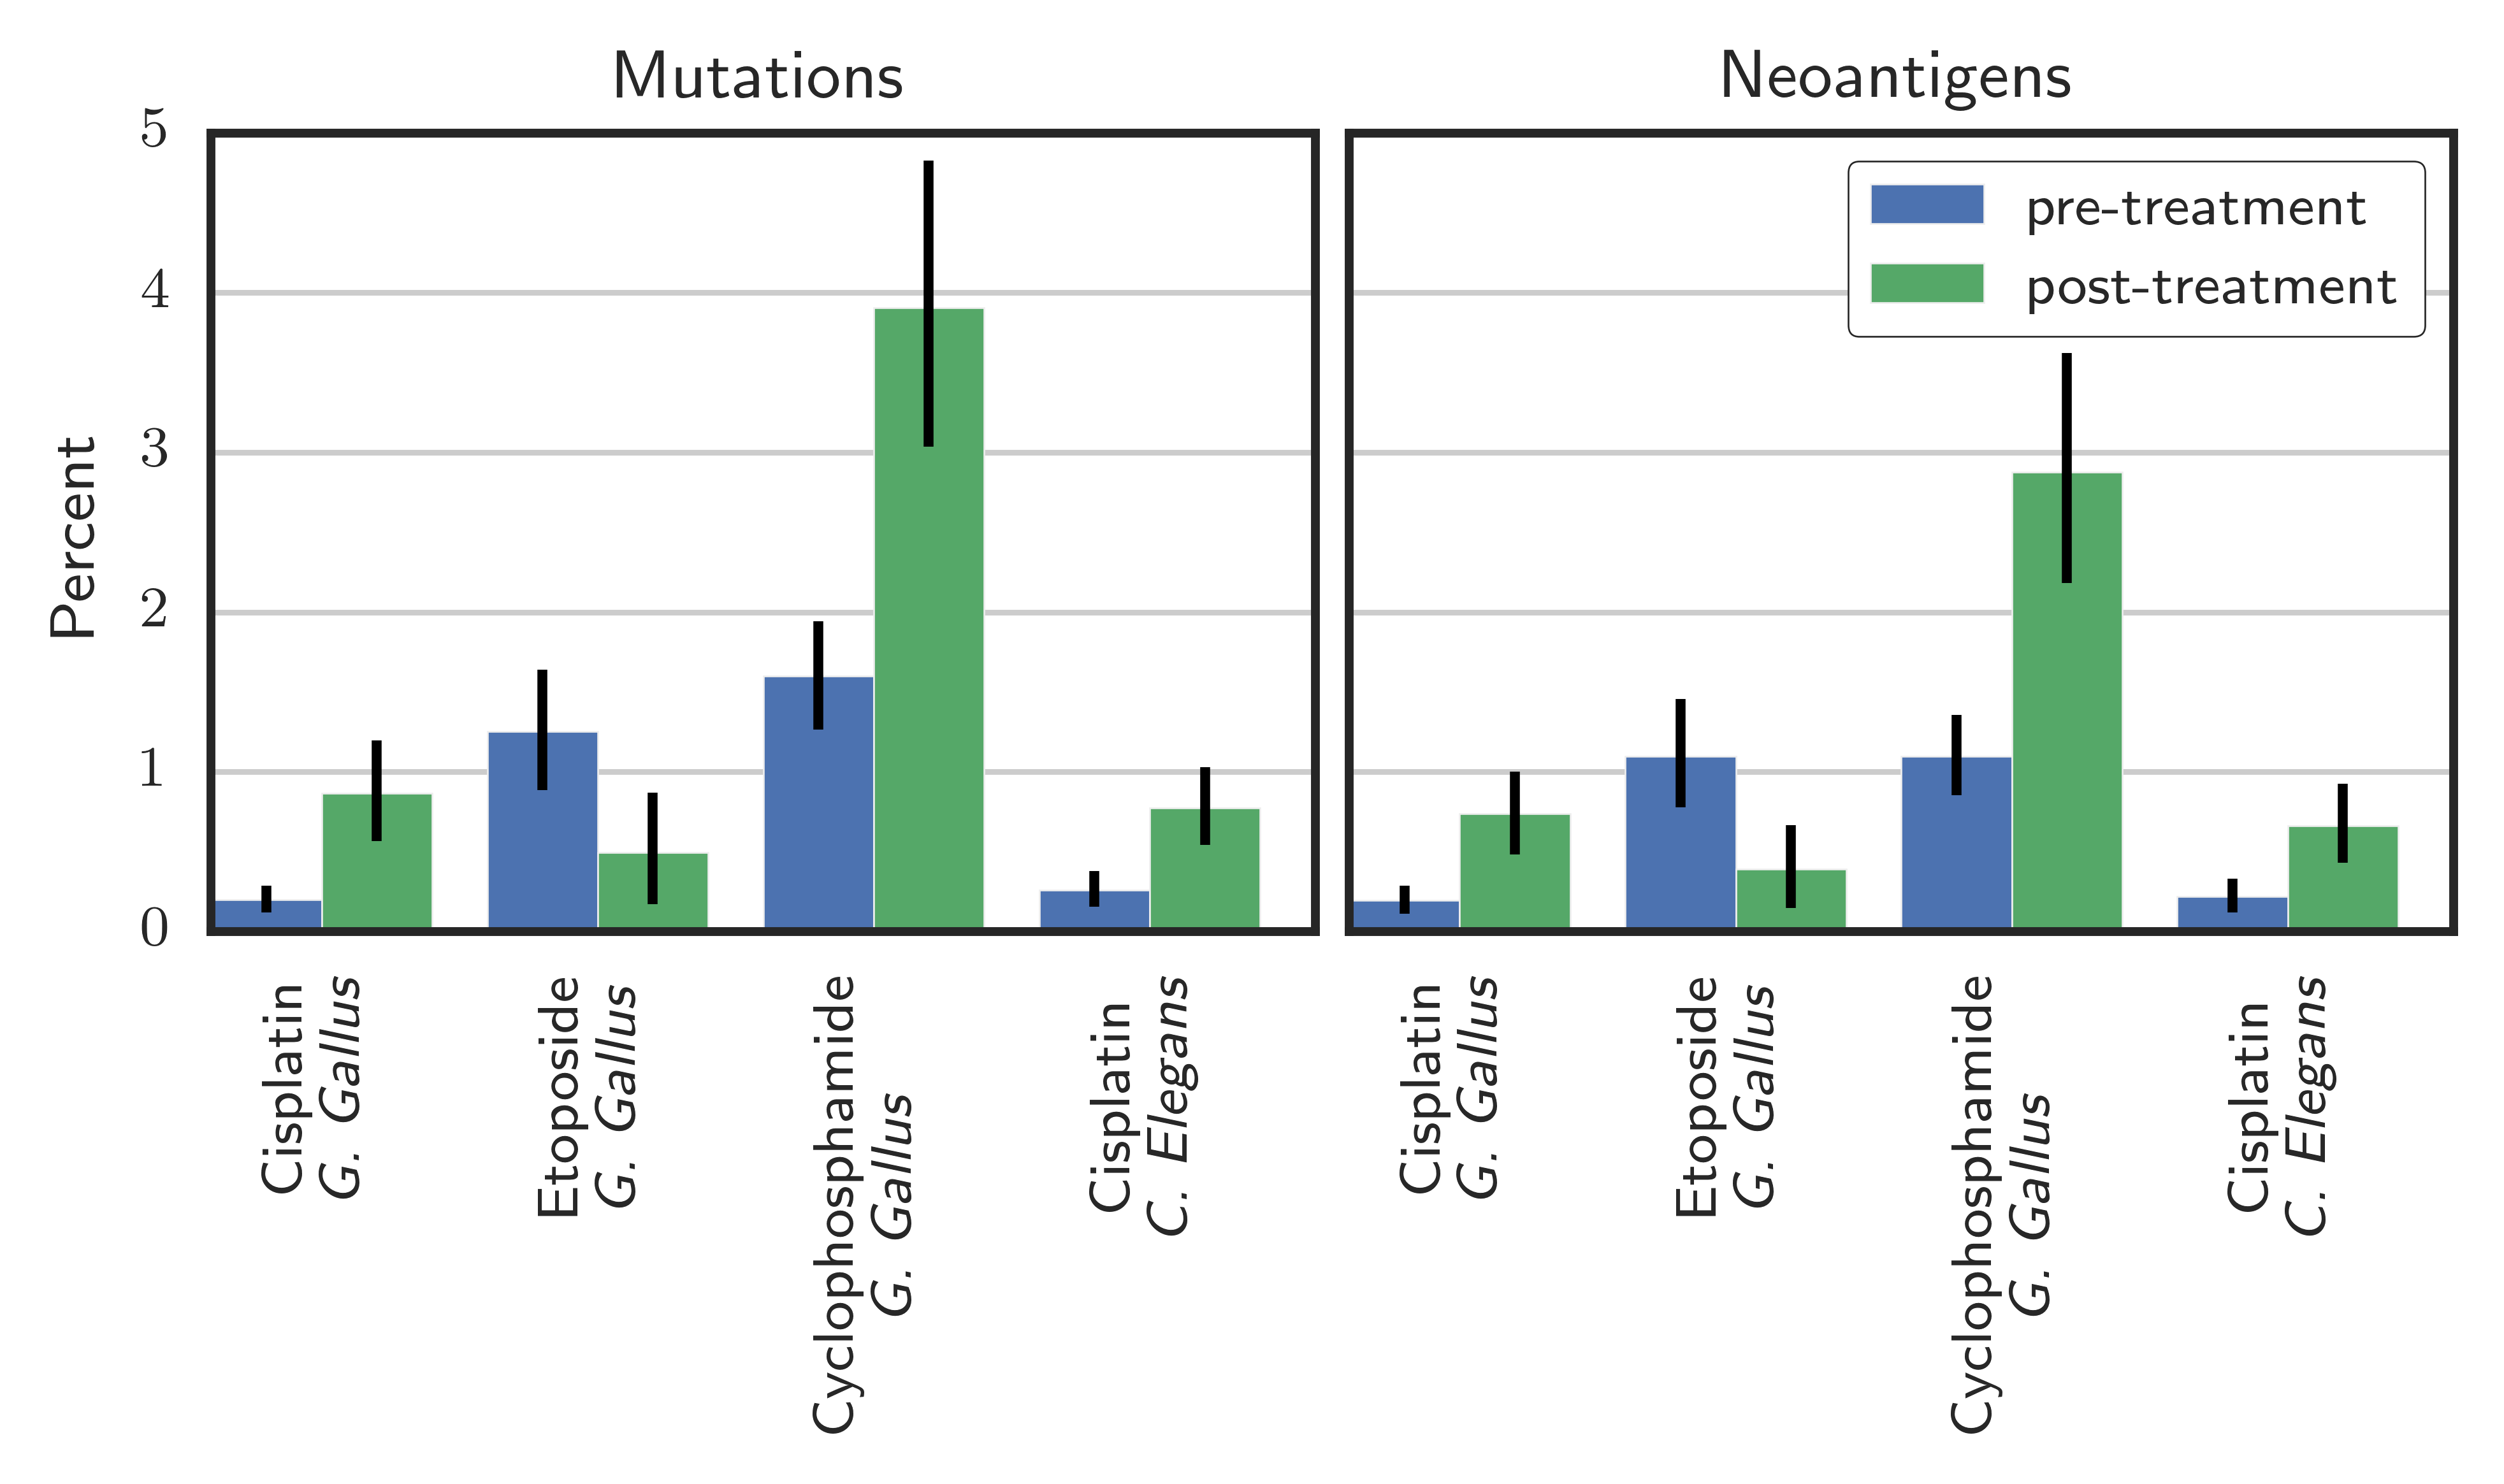

In [90]:
display_signatures = [
    "Cisplatin Gallus gallus",
    "Etoposide Gallus gallus",
    'Cyclophosphamide Gallus gallus',
    'Cisplatin C Elegans',
    #'Cisplatin C Elegans fcd 2',
    #'Cisplatin C Elegans polq 1',
    #'Cisplatin C Elegans xpf 1',
   # "Signature 1",
   # "Signature 3",
   # "Signature 8",
   # "other snv",
   # "residual",
   # "mnv",
   # "indel",
]

import itertools

def cleanup_name(col):
    return (
        col
        .replace("mnv", "MNV")
        .replace("mutations", "")
        .replace("neoantigens", "")
        .replace("other snv", "Other")
        .replace("indel", "Indel")
        .replace("residual", "Unclassified")
        .replace("chemo", "Chemo")
        .replace("Signature 1", "(1) Age")
        .replace("Signature 3", "(3) BRCA")
        .replace("Signature 8", "(8)")
        .replace("C Elegans", "\n\\textit{C. Elegans}")
        .replace("Gallus gallus", "\n\\textit{G. Gallus}")
        .replace("fcd 2", r"\textit{fcd-2}")
        .replace("polq 1", r"\textit{polq-1}")
        .replace("xpf 1", r"\textit{xpf-1}")
        .strip())


def plot_mutations_or_neoantigens(which):
    palette = itertools.cycle(seaborn.color_palette())
    cols = [x + " " + which for x in display_signatures]
    masks = [
        ("pre-treatment", (~ sources_with_signature_counts.treated)),
        ("post-treatment", (sources_with_signature_counts.treated)),
    ]
    offset = 0
    for (label, mask) in masks:
        label_sources = sources_with_signature_counts.ix[mask]
        xs = numpy.arange(len(cols)) * 2.5 + offset
        ys = numpy.array([label_sources[col].mean() for col in cols]) * 100.0
        print(which, label, ys.sum(), ys)
        ranges = numpy.array([bootstrap(label_sources[col]) for col in cols]).T * 100.0
        error_low = ys - ranges[0]
        error_hi = ranges[1] - ys
        pyplot.bar(
            xs,
            ys,
            yerr=numpy.array([error_low, error_hi]),
            ecolor="black",
            capsize=0,
            label=label,
            color=next(palette),
            width=1.0)
        offset += 1
        
    pyplot.xticks(xs - 0.05, [cleanup_name(c) for c in cols], rotation=90)


pyplot.figure(figsize=(5,3))
seaborn.set_context("paper")
seaborn.set_style('white')

pyplot.subplot(121)
plot_mutations_or_neoantigens("mutations")
pyplot.title("Mutations")
pyplot.ylabel("Percent")
pyplot.gca().yaxis.grid(True)

#for label in pyplot.gca().yaxis.get_ticklabels()[1::2]:
#    label.set_visible(False)
    
pyplot.subplot(122, sharey=pyplot.gca())
plot_mutations_or_neoantigens("neoantigens")
pyplot.title("Neoantigens")
pyplot.gca().yaxis.grid(True)
pyplot.gca().label_outer()

legend = pyplot.legend(ncol=1, fancybox=True, frameon=True, fontsize='small', framealpha=1, bbox_to_anchor=(1.0, 1.0))
legend.get_frame().set_facecolor('white')
legend.set_zorder(200)

pyplot.tight_layout(w_pad=0.5)

pyplot.savefig("../figures/sources_of_mutations_and_neoantigens_ungrouped.pdf",
               bbox_extra_artists=(legend,),
               bbox_inches='tight')


In [69]:
#(sources_with_signature_counts[sources.treated]["chemo mutations"] > 0).sum()
(sources_with_signature_counts[sources.treated]["chemo mutations"] < .12).sum()


32

In [70]:
treatments_matrix.sum(1).sort(ascending=False, inplace=False)

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


source_id
AOCS-092-3-3     8
AOCS-134-3-9     6
AOCS-138-3-X     6
AOCS-155-3-5     6
AOCS-117-3-3     5
AOCS-095-3-1     5
AOCS-135-3-1     5
AOCS-135-8-X     5
AOCS-086-3-2     5
AOCS-091-3-0     5
AOCS-034-3-8     5
AOCS-064-3-3     5
AOCS-093-3-6     5
AOCS-120-3-6     4
AOCS-065-3-6     4
AOCS-139-6-3     4
AOCS-141-8-0     4
AOCS-141-3-2     4
AOCS-150-8-X     4
AOCS-139-12-5    4
AOCS-137-3-7     4
AOCS-139-19-0    4
AOCS-150-3-1     4
AOCS-167-13-9    4
AOCS-167-3-2     4
                ..
AOCS-170-1-8     0
AOCS-170-3-5     0
AOCS-143-1-0     0
AOCS-139-1-5     0
AOCS-137-1-X     0
AOCS-171-1-0     0
AOCS-107-1-4     0
AOCS-108-1-7     0
AOCS-109-1-X     0
AOCS-111-1-X     0
AOCS-112-1-2     0
AOCS-113-1-5     0
AOCS-114-1-8     0
AOCS-115-1-0     0
AOCS-122-1-4     0
AOCS-133-1-9     0
AOCS-123-1-7     0
AOCS-124-1-X     0
AOCS-125-1-2     0
AOCS-126-1-5     0
AOCS-128-1-0     0
AOCS-130-1-0     0
AOCS-131-1-3     0
AOCS-132-1-6     0
AOCS-001-1-7     0
dtype: int64

In [71]:
sources_with_signature_counts["chemo mutations"].sort(ascending=False, inplace=False)


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


source_id
AOCS-092-3-3     0.209371
AOCS-091-3-0     0.130625
AOCS-095-3-1     0.120636
AOCS-064-3-3     0.108484
AOCS-138-3-X     0.106095
AOCS-086-3-2     0.102063
AOCS-117-3-3     0.090371
AOCS-139-12-5    0.087388
AOCS-150-3-1     0.085265
AOCS-137-3-7     0.084712
AOCS-171-1-0     0.080014
AOCS-155-3-5     0.075964
AOCS-150-8-X     0.074421
AOCS-125-1-2     0.074117
AOCS-171-3-8     0.072164
AOCS-088-3-8     0.070569
AOCS-107-1-4     0.068398
AOCS-064-1-6     0.065698
AOCS-141-8-0     0.062905
AOCS-034-3-8     0.062105
AOCS-139-19-0    0.061844
AOCS-147-1-1     0.060644
AOCS-114-1-8     0.057732
AOCS-091-1-3     0.052814
AOCS-109-1-X     0.052354
                   ...   
AOCS-061-1-8     0.000000
AOCS-076-1-3     0.000000
AOCS-077-1-6     0.000000
AOCS-005-1-8     0.000000
AOCS-116-1-3     0.000000
AOCS-084-1-X     0.000000
AOCS-085-1-2     0.000000
AOCS-170-3-5     0.000000
AOCS-170-1-8     0.000000
AOCS-166-1-2     0.000000
AOCS-162-1-1     0.000000
AOCS-159-1-9     0.000000
AO

In [72]:
sources_with_signature_counts["chemo neoantigens"].sort(ascending=False, inplace=False)


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


source_id
AOCS-092-3-3     0.146898
AOCS-095-3-1     0.105529
AOCS-064-3-3     0.090293
AOCS-117-3-3     0.090262
AOCS-150-3-1     0.084460
AOCS-138-3-X     0.080095
AOCS-091-3-0     0.079086
AOCS-137-3-7     0.075027
AOCS-125-1-2     0.069991
AOCS-139-12-5    0.068290
AOCS-155-3-5     0.066669
AOCS-086-3-2     0.064810
AOCS-150-8-X     0.061902
AOCS-107-1-4     0.056538
AOCS-075-1-0     0.053328
AOCS-171-1-0     0.052901
AOCS-064-1-6     0.047886
AOCS-171-3-8     0.047360
AOCS-147-1-1     0.045293
AOCS-139-19-0    0.044860
AOCS-088-3-8     0.043146
AOCS-141-8-0     0.043145
AOCS-167-3-2     0.041994
AOCS-034-3-8     0.041922
AOCS-143-1-0     0.040736
                   ...   
AOCS-076-1-3     0.000000
AOCS-077-1-6     0.000000
AOCS-005-1-8     0.000000
AOCS-061-1-8     0.000000
AOCS-116-1-3     0.000000
AOCS-084-1-X     0.000000
AOCS-085-1-2     0.000000
AOCS-170-3-5     0.000000
AOCS-170-1-8     0.000000
AOCS-166-1-2     0.000000
AOCS-162-1-1     0.000000
AOCS-159-1-9     0.000000
AO

In [73]:
sources_with_signature_counts["chemo mutations"].sort(ascending=False, inplace=False)

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


source_id
AOCS-092-3-3     0.209371
AOCS-091-3-0     0.130625
AOCS-095-3-1     0.120636
AOCS-064-3-3     0.108484
AOCS-138-3-X     0.106095
AOCS-086-3-2     0.102063
AOCS-117-3-3     0.090371
AOCS-139-12-5    0.087388
AOCS-150-3-1     0.085265
AOCS-137-3-7     0.084712
AOCS-171-1-0     0.080014
AOCS-155-3-5     0.075964
AOCS-150-8-X     0.074421
AOCS-125-1-2     0.074117
AOCS-171-3-8     0.072164
AOCS-088-3-8     0.070569
AOCS-107-1-4     0.068398
AOCS-064-1-6     0.065698
AOCS-141-8-0     0.062905
AOCS-034-3-8     0.062105
AOCS-139-19-0    0.061844
AOCS-147-1-1     0.060644
AOCS-114-1-8     0.057732
AOCS-091-1-3     0.052814
AOCS-109-1-X     0.052354
                   ...   
AOCS-061-1-8     0.000000
AOCS-076-1-3     0.000000
AOCS-077-1-6     0.000000
AOCS-005-1-8     0.000000
AOCS-116-1-3     0.000000
AOCS-084-1-X     0.000000
AOCS-085-1-2     0.000000
AOCS-170-3-5     0.000000
AOCS-170-1-8     0.000000
AOCS-166-1-2     0.000000
AOCS-162-1-1     0.000000
AOCS-159-1-9     0.000000
AO

In [74]:
'''
display_signatures = ["Signature 1", "Signature 3", "Signature 4"]
def calculate(sub_df):
    categories = [
#        ("Indel", sub_df.indel.astype(int)),
#        ("MNV", ((~sub_df.indel) & (~sub_df.snv)).astype(int)),
    ]
    for sig in display_signatures:
        categories.append((sig, sub_df[sig]))
    categories.append(
        ("Other SNV", sub_df[[c for c in sub_df.columns if "Signature" in c and c not in display_signatures]].sum(1)))
    columns = collections.defaultdict(list)
    for (name, category) in categories:
        print(name)
        columns["%s mutations" % name].append(category.sum())
        columns["%s neoantigens" % name].append(numpy.dot(category, sub_df.num_binders))
    return pandas.DataFrame(columns)
    
calculate(mutations_with_signatures_exon[mutations_with_signatures_exon.unique_to_treated])



def calculate(sub_df):
    #print(sub_df)
    group_sum = sub_df.groupby(["snv", "indel"]).num_binders.sum()
    group_count = sub_df.groupby(["snv", "indel"]).num_binders.count()
    df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
    df["peptide fraction"] = df["sum"] / df["sum"].sum()
    df["mut fraction"] = df["count"] / df["count"].sum()
    return df

def bootstrap_mean_df(full_df, calculate_function, stratify_column, samples=5000):
    col_values = full_df[stratify_column].unique()
    dfs = pandas.Panel(
        dict((i, calculate_function(full_df.ix[full_df[stratify_column].isin(sklearn.utils.resample(col_values))]))
             for i in range(samples)))
    num_removed = 0
    for i in dfs.items:
        if pandas.isnull(dfs.ix[i]).any().any():
            del dfs[i]
            num_removed += 1
    print("Removed %d nan entires" % num_removed)
        
    #dfs = pandas.Panel(dict((i, calculate_function(df)) for (i, df) in full_df.groupby(stratify_column)))
    #return dfs
    #print(dfs)
    #means = calculate_function(full_df)
    df_mean = dfs.mean(0)
    df_low = pandas.DataFrame(numpy.percentile(dfs, 5, axis=0), index=df_mean.index, columns=df_mean.columns)
    df_hi = pandas.DataFrame(numpy.percentile(dfs, 95, axis=0), index=df_mean.index, columns=df_mean.columns)
    df_combined = pandas.DataFrame(
        dict([(col, [
                        "%0.2f (%0.2f-%0.2f)" % (df_mean[col][i], df_low[col][i], df_hi[col][i])
                        for i in df_mean.index
                    ])
            for col in df_mean.columns]),
        index=df_mean.index)

    return (df_combined, df_mean, df_low, df_hi)

    for col in df_mean.columns:
        #cis = [(i, bootstrap(row)) for (i, row) in dfs[:,:,col].T.iterrows()]
        #cis = [(i, (min(row), (max(row)))) for (i, row) in dfs[:,:,col].T.iterrows()]
        means["%s_low" % col] = pandas.Series([x[1][0] for x in cis], index=[x[0] for x in cis])
        means["%s_high" % col] = pandas.Series([x[1][1] for x in cis], index=[x[0] for x in cis])
        means["%s_string" % col] = pandas.Series(
            ["%0.2f (%0.2f-%0.2f)" % ((means[col][x[0]],) + x[1]) for x in cis], index=[x[0] for x in cis])
    return means

unique=bootstrap_mean_df(
    aocs_muts_exon[aocs_muts_exon.unique_to_treated & aocs_muts_exon.source_id.isin(sources_with_unique_to_treated)],
    calculate,
    "source_id")

unique[0]



untreated = x=bootstrap_mean_df(
    aocs_muts_exon[aocs_muts_exon.source_id.isin(sources.index[~ sources.treated])],
    calculate,
    "source_id")
untreated[0]






seaborn.set_context("paper")
seaborn.set_style('whitegrid')
pyplot.figure(figsize=(8,3))
def plot_dfs(dfs):
    offset = 0
    palette = itertools.cycle(seaborn.color_palette())
    for (label, col) in [("mutations", "mut fraction"), ("neoantigens", "peptide fraction")]:
        indexing = [(True, False), (False, False), (False, True)]
        ys = numpy.array([dfs[1].ix[index][col] for index in indexing]) * 100.0
        error_low = ys - numpy.array([dfs[2].ix[index][col] for index in indexing]) * 100.0
        error_hi = numpy.array([dfs[3].ix[index][col] for index in indexing]) * 100.0 - ys
        xs = numpy.array([1,3.5,6]) + offset
        pyplot.bar(
            xs,
            ys,
            yerr=numpy.array([error_low, error_hi]),
            ecolor="black",
            label=label,
            color=next(palette),
            width=1.0)
        offset += 1
    pyplot.xticks(xs - 0.05, ["SNV", "MNV", "indel"])

pyplot.subplot(121)
plot_dfs(untreated)
pyplot.title("Untreated")
#pyplot.ylabel("percent")
pyplot.legend(loc='center right')
pyplot.ylim(ymin=0, ymax=100)
pyplot.subplot(122)
plot_dfs(unique)
pyplot.title("Unique to treated")
pyplot.ylim(ymin=0, ymax=100)
pyplot.yticks(numpy.arange(0, 100, 20), [""] * 6)
pyplot.tight_layout()
pyplot.savefig("../sources_of_mutations_and_neoantigens.pdf")
'''

'\ndisplay_signatures = ["Signature 1", "Signature 3", "Signature 4"]\ndef calculate(sub_df):\n    categories = [\n#        ("Indel", sub_df.indel.astype(int)),\n#        ("MNV", ((~sub_df.indel) & (~sub_df.snv)).astype(int)),\n    ]\n    for sig in display_signatures:\n        categories.append((sig, sub_df[sig]))\n    categories.append(\n        ("Other SNV", sub_df[[c for c in sub_df.columns if "Signature" in c and c not in display_signatures]].sum(1)))\n    columns = collections.defaultdict(list)\n    for (name, category) in categories:\n        print(name)\n        columns["%s mutations" % name].append(category.sum())\n        columns["%s neoantigens" % name].append(numpy.dot(category, sub_df.num_binders))\n    return pandas.DataFrame(columns)\n    \ncalculate(mutations_with_signatures_exon[mutations_with_signatures_exon.unique_to_treated])\n\n\n\ndef calculate(sub_df):\n    #print(sub_df)\n    group_sum = sub_df.groupby(["snv", "indel"]).num_binders.sum()\n    group_count = sub_d

In [75]:
all_mutations_with_signatures_primary_and_new["any_chemo"] = all_mutations_with_signatures_primary_and_new[[
        "Cisplatin Gallus gallus",
        "Cyclophosphamide Gallus gallus",
        "Cisplatin C Elegans",
        #"Cisplatin C Elegans fcd 2",
        #"Cisplatin C Elegans polq 1",
        #"Cisplatin C Elegans xpf 1",
    ]].sum(1)
all_mutations_with_signatures_primary_and_new

,index,source_id,donor,genome,contig,interbase_start,interbase_end,ref,alt,sources,effect,gene,context_5_prime,context_3_prime,context_mutation,binding_affinity,binding_allele,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,context_mutation_3p5p,binding_peptides,...,Signature 12,Signature 13,Signature 14,Signature 15,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25,Signature 26,Signature 27,Signature 28,Signature 29,Signature 30,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans,residual,any_chemo
0,0,AOCS-001-1-7,AOCS-001,GRCh37,14,24774226.0,24774227.0,C,A,annotated_mutations,silent,NOP9,ACCTTCCTAAAGCGG,GAGAGGCTTGGGAAC,C>A,NaN,NaN,17.0,28.0,45.0,185.0,244.0,429.0,G(C>A)G,{},...,0.000000,0.003055,0.0,0.0,0.271404,0.0,0.0,0.000000,0.0,0.002607,0.000326,0.0,0.404463,0.008630,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00,0.000000
1,1,AOCS-001-1-7,AOCS-001,GRCh37,X,19968971.0,19968972.0,T,C,annotated_mutations,p.I548M,CXorf23,GTCATTTGGATCTAT,ATTTTGATCAGAGTC,T>C,94.33,B*41:01,16.0,51.0,67.0,0.0,77.0,77.0,T(T>C)A,"{'TLIKMIDPNDL': 12113.63, 'SEQTLIKMI': 166.52,...",...,0.000000,0.004740,0.0,0.0,0.355338,0.0,0.0,0.006423,0.0,0.064775,0.000900,0.0,0.002802,0.036467,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-2.218086e-15,0.000000
2,2,AOCS-001-1-7,AOCS-001,GRCh37,8,35406835.0,35406836.0,G,A,annotated_mutations,p.E44K,UNC5D,CTGATGGGATGGATT,GGGAAGGGCTTCGCC,C>T,80.84,A*11:01,14.0,39.0,53.0,0.0,0.0,0.0,T(C>T)G,"{'NGEALPKSIP': 46300.87, 'GTDNGEALPK': 80.84, ...",...,0.000000,0.032725,0.0,0.0,0.046130,0.0,0.0,0.009861,0.0,0.018612,0.000249,0.0,0.007925,0.031388,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00,0.000000
3,3,AOCS-001-1-7,AOCS-001,GRCh37,7,47872830.0,47872831.0,A,G,annotated_mutations,p.L2065P,HUS1 PKD1L1,CTGCATCAGCCATTC,CTCTGGGAGTGGCAG,T>C,343.29,A*11:01,16.0,31.0,47.0,0.0,1.0,1.0,C(T>C)C,"{'KQPASAIPS': 21387.37, 'ASAIPSGSGR': 343.29, ...",...,0.000000,0.000225,0.0,0.0,0.240680,0.0,0.0,0.007426,0.0,0.014302,0.000218,0.0,0.006371,0.023243,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-5.164558e-16,0.000000
4,4,AOCS-001-1-7,AOCS-001,GRCh37,17,17721666.0,17721667.0,G,C,annotated_mutations,p.R394G,SREBF1,AAATCTGCTGTCTTG,GCAAGGCCATCGACT,C>G,43.42,C*15:02,12.0,22.0,34.0,200.0,54.0,254.0,G(C>G)G,"{'KSAVLGKA': 3782.49, 'LNKSAVLGKAI': 20883.23,...",...,0.000000,0.005800,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000472,0.0,0.109925,0.012325,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-3.827825e-16,0.000000
5,5,AOCS-001-1-7,AOCS-001,GRCh37,7,148169063.0,148169064.0,G,T,annotated_mutations,intergenic,None,CAAAGAAGGGCCACC,AATCTAAACCAGCAC,C>A,NaN,NaN,19.0,39.0,58.0,0.0,0.0,0.0,C(C>A)A,{},...,0.000000,0.005861,0.0,0.0,0.130207,0.0,0.0,0.007843,0.0,0.001888,0.000483,0.0,0.060020,0.021127,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00,0.000000
6,6,AOCS-001-1-7,AOCS-001,GRCh37,1,107152783.0,107152784.0,G,A,annotated_mutations,intergenic,None,TCCACTGTGTTTGTT,ATCCCTTACAAAAGA,C>T,NaN,NaN,14.0,69.0,83.0,0.0,0.0,0.0,T(C>T)A,{},...,0.000000,0.247194,0.0,0.0,0.089237,0.0,0.0,0.009671,0.0,0.003828,0.000136,0.0,0.015897,0.009996,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00,0.000000
7,7,AOCS-001-1-7,AOCS-001,GRCh37,2,142133268.0,142133269.0,T,A,annotated_mutations,intronic,LRP1B,GCATTAAATTCCCAA,ATTGCACTTTGGTCC,T>A,NaN,NaN,9.0,28.0,37.0,0.0,0.0,0.0,A(T>A)A,{},...,0.000000,0.009344,0.0,0.0,0.145422,0.0,0.0,0.001689,0.0,0.017178,0.011556,0.0,0.002415,0.063798,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000000e+00,0.000000
8,8,AOCS-001-1-7,AOCS-001,GRCh37,2,143687576.0,143687577.0,G,A,annotated_mutations,intronic,KYNU,GCCCTACAAAGCCTT,TGTTGTGAGGGAAAA,C>T,NaN,NaN,11.0,55.0,66.0,0.0,0.0,0.0,T(C>T)T,{},...,0.000000,0.080019,0.0,0.0,0.131129,0.0,0.0,0.015512,0.0,0.005013,0.000104,0.0,0.004335,0.014676,0.0,0.0,0.000000,0.0,0.0,0.0

In [76]:
cutoff = 0.20

In [77]:
all_mutations_with_signatures_primary_and_new.ix[all_mutations_with_signatures_primary_and_new.any_chemo > cutoff].vaf.shape

(33771,)

In [78]:
all_mutations_with_signatures_primary_and_new.ix[all_mutations_with_signatures_primary_and_new.any_chemo > cutoff].vaf.mean()

0.315755834205737

In [79]:
all_mutations_with_signatures_primary_and_new.ix[all_mutations_with_signatures_primary_and_new.any_chemo >= 0].vaf.mean()

0.33232762828362433

In [80]:
x = all_mutations_with_signatures_primary_and_new.ix[all_mutations_with_signatures_primary_and_new.source_id.isin(sources.index[sources.treated])]
scipy.stats.mstats.mannwhitneyu(x.ix[x.any_chemo > cutoff].vaf, x.ix[x.any_chemo < cutoff].vaf)

MannwhitneyuResult(statistic=4834745899.5, pvalue=0.0)

In [81]:
s=all_mutations_with_signatures_primary_and_new.ix[all_mutations_with_signatures_primary_and_new.source_id.isin(sources.index[sources.treated])].groupby("source_id").apply(
    lambda x: 1 - x.ix[x.any_chemo > cutoff].vaf.mean() / x.ix[x.any_chemo < cutoff].vaf.mean()).dropna()
print(s.mean(), bootstrap(s))

0.11241620514658598 (0.076490300570116243, 0.15294233526278073)


In [82]:
s=all_mutations_with_signatures_primary_and_new.ix[all_mutations_with_signatures_primary_and_new.source_id.isin(sources.index[sources.treated])].groupby("source_id").apply(
    lambda x: (x.ix[x.any_chemo > cutoff].vaf > x.vaf.quantile(.90)).mean() ).dropna()
print(s.mean(), bootstrap(s))

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


0.061158991820418084 (0.049332201962408964, 0.0727980004966403)


In [89]:
s=all_mutations_with_signatures_primary_and_new.ix[all_mutations_with_signatures_primary_and_new.source_id.isin(sources.index[sources.treated])].groupby("source_id").apply(
    lambda x: (x.ix[x.any_chemo < cutoff].vaf > x.vaf.quantile(.90)).mean() ).dropna()
print(s.mean(), bootstrap(s))

0.10216595660781466 (0.10114667770026593, 0.10335599412399679)


In [88]:
(
    all_mutations_with_signatures_primary_and_new.ix[
    all_mutations_with_signatures_primary_and_new.source_id.isin(sources.index[sources.treated])]
    .groupby("source_id")
    .apply(lambda x: (x.ix[x.any_chemo > cutoff].vaf > x.vaf.quantile(.90)).mean() ).dropna()
)

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


source_id
AOCS-034-3-8     0.000000
AOCS-064-3-3     0.088002
AOCS-065-3-6     0.035714
AOCS-086-3-2     0.043617
AOCS-088-3-8     0.044351
AOCS-091-3-0     0.077645
AOCS-092-3-3     0.068438
AOCS-093-3-6     0.011132
AOCS-095-3-1     0.050813
AOCS-117-3-3     0.087735
AOCS-119-3-9     0.120000
AOCS-137-3-7     0.064965
AOCS-138-3-X     0.084465
AOCS-139-12-5    0.035817
AOCS-139-19-0    0.027060
AOCS-141-3-2     0.077586
AOCS-141-8-0     0.087234
AOCS-150-3-1     0.096314
AOCS-150-8-X     0.095675
AOCS-155-3-5     0.087774
AOCS-167-3-2     0.000000
dtype: float64